# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth= './data/asos/olympia/hr_avg.csv', 0.5 # might block
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path, bandwidth= 'data/ECMWF/usa/47N123W/dat.csv', 0.7# good, 4 might be slightly better
# file_path, bandwidth = 'data/ECMWF/venezuela/8N67W/dat.csv', 0.7 # good enough, can be coorect, still need other investigation.
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.9 # good
# file_path, bandwidth = 'data/ECMWF/iceland/65N17W/dat.csv', 1.9 # good enough, might try 4?
# file_path, bandwidth = 'data/ECMWF/germany/49N9E/dat.csv', 0.5 # miss peak, force low bandwidth
# file_path, bandwdith = 'data/ECMWF/sudan/18N32E/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/china/24N121E/dat.csv', 0.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/australia/37S142E/dat.csv', 0.7, 4 # miss the peak, force the bandwidth
# file_path= 'data/ECMWF/australia/37S142E/dat.csv' # miss the peak, force the bandwidth

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x=-df.x
    df.y=-df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False
    cartesian = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19560820  0000  FM-12  200    5.1         N
1       19560820  0300  FM-12  250    4.1         N
2       19560820  0600  FM-12  250    5.1         N
3       19560820  0900  FM-12  270    6.2         N
4       19560820  1200  FM-12  270    5.1         N
5       19560820  1800  FM-12  290    3.1         N
6       19560820  2100  FM-12  320    3.1         N
7       19560821  0000  FM-12  320    3.1         N
8       19560821  0300  FM-12  290    4.1         N
9       19560821  0600  FM-12  270    5.1         N
10      19560821  0900  FM-12  320    2.1         N
11      19560821  1200  FM-12   90    1.0         N
12      19560821  1800  FM-12  140    2.1         N
13      19560821  2100  FM-12  140    2.1         N
14      19560822  0300  FM-12  140    6.2         N
15      19560822  0600  FM-12  160    4.1         N
16      19560822  1200  FM-12  140    4.1         N
17      19560822  1800  FM-12  200    3.1         N
18      19560822  2100  FM-12  290    7.2         N
19      19560823  0300  FM-12  270    7.2         N
20      19560823  0900  FM-12  320    5.1         N
21      19560823  1200  FM-12  270    1.0         N
22      19560823  2100  FM-12  999    0.0         C
23      19560824  0000  FM-12  999    0.0         C
24      19560824  0300  FM-12  270    1.0         N
25      19560824  0600  FM-12   90    1.0         N
26      19560824  0900  FM-12  160    2.1         N
27      19560824  1200  FM-12  999    0.0         C
28      19560824  1800  FM-12  999    0.0         C
29      19560824  2100  FM-12  140    4.1         N
...          ...   ...    ...  ...    ...       ...
359333  20150301  0900  FM-15  270    4.0         N
359334  20150301  0930  FM-15  260    4.0         V
359335  20150301  1000  FM-15  250    4.0         V
359336  20150301  1030  FM-15  250    3.0         V
359337  20150301  1100  FM-15  260    4.0         N
359338  20150301  1130  FM-15  230    3.0         N
359339  20150301  1200  FM-15  230    2.0         V
359340  20150301  1230  FM-15  270    3.0         N
359341  20150301  1300  FM-15  240    2.0         V
359342  20150301  1330  FM-15  260    2.0         V
359343  20150301  1400  FM-15  250    2.0         V
359344  20150301  1430  FM-15  240    2.0         V
359345  20150301  1500  FM-15  999    0.0         C
359346  20150301  1530  FM-15  999    1.0         V
359347  20150301  1600  FM-15  999    1.0         V
359348  20150301  1630  FM-15  210    1.0         N
359349  20150301  1700  FM-15  999    1.0         V
359350  20150301  1730  FM-15  999    1.0         V
359351  20150301  1800  FM-15  999    1.0         V
359352  20150301  1830  FM-15  180    1.0         N
359353  20150301  1900  FM-15  160    1.0         N
359354  20150301  1930  FM-15  210    1.0         N
359355  20150301  2000  FM-15  230    2.0         N
359356  20150301  2030  FM-15  230    1.0         N
359357  20150301  2100  FM-15  240    2.0         N
359358  20150301  2130  FM-15  180    1.0         N
359359  20150301  2200  FM-15  160    1.0         N
359360  20150301  2230  FM-15  150    1.0         N
359361  20150301  2300  FM-15  190    2.0         N
359362  20150301  2330  FM-15  190    1.0         N

[359363 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

31.198 121.336


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


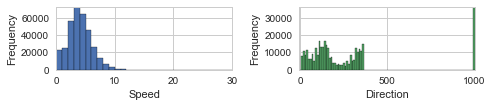

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

date           HrMn            dir          speed  \
count  3.369710e+05  336971.000000  336971.000000  336971.000000   
mean   2.000006e+07    1128.070137     268.228497       3.543890   
std    1.115119e+05     691.735348     275.924866       2.002307   
min    1.973010e+07       0.000000       0.000000       0.000000   
25%    1.991120e+07     530.000000      90.000000       2.000000   
50%    2.002062e+07    1100.000000     200.000000       3.000000   
75%    2.010050e+07    1730.000000     320.000000       5.000000   
max    2.015030e+07    2357.000000     999.000000      30.000000   

        dir_windrose  
count  336971.000000  
mean      248.807883  
std       279.529540  
min         0.000000  
25%        90.000000  
50%       150.000000  
75%       310.000000  
max       999.000000

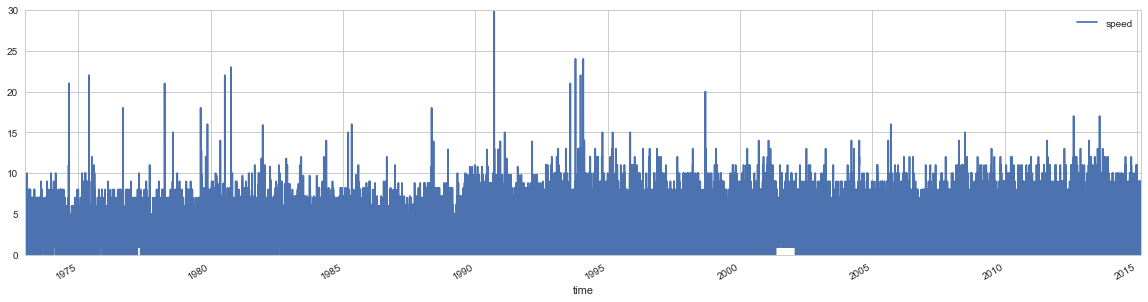

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if 'cartesian' in globals():
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


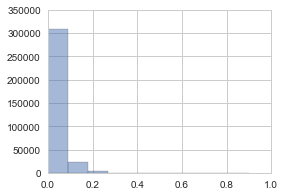

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

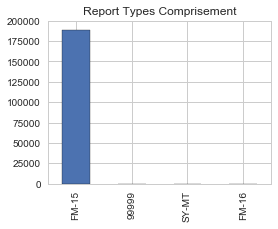

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

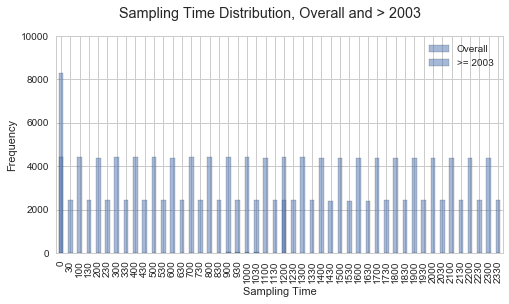

In [12]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0, 30]


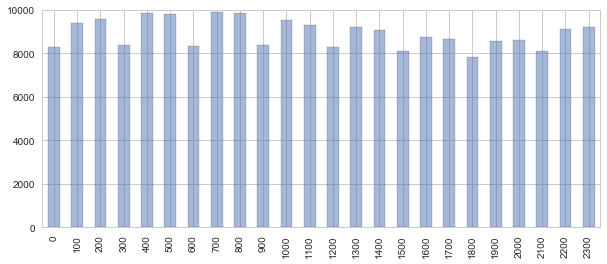

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df['2000':]['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  dir_windrose
time                                                                          
1994-01-28 00:00:00  19940128     0  FM-15  119    3.0         N           331
1994-07-18 10:00:00  19940718  1000  FM-15  337    5.0         N           113
1994-08-05 11:00:00  19940805  1100  FM-15  335    9.0         N           115
1994-08-10 05:00:00  19940810   500  FM-15  319   10.0         N           131
1994-09-03 21:00:00  19940903  2100  FM-15  331    5.0         N           119
1994-12-03 14:00:00  19941203  1400  FM-15  316    3.0         N           134
1995-04-03 13:00:00  19950403  1300  FM-15  337    3.0         N           113
1998-06-03 11:00:00  19980603  1100  FM-15   59   10.0         N            31
1998-09-09 12:00:00  19980909  1200  FM-15  359   20.0         N            91

sudden increase in speed

date  HrMn   type  dir  speed wind_type  \
time                                                               
1993-12-21 22:00:00  19931221  2200  FM-15  110   22.0         N   
1993-08-02 14:00:00  19930802  1400  FM-15  140   21.0         N   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N   
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N   
2008-07-02 08:00:00  20080702   800  FM-15  170   15.0         N   

                     dir_windrose  incre  incre_reverse  
time                                                     
1993-12-21 22:00:00           340   19.0           20.0  
1993-08-02 14:00:00           310   17.0           21.0  
1985-04-30 08:00:00           140    9.8            9.8  
2005-09-11 17:00:00            90    4.0            4.0  
1981-12-19 07:00:00           310   13.9            3.1  
1994-10-20 08:00:00           310    6.0            8.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
2012-08-08 04:00:00            90    2.0            0.0  
2008-07-02 08:00:00           280   10.0           13.0

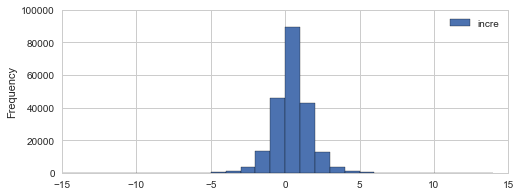

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 2


date  HrMn   type  dir  speed wind_type  \
time                                                               
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N   
1995-03-09 15:00:00  19950309  1500  FM-15  110   15.0         N   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N   
2013-03-09 17:00:00  20130309  1700  FM-15   80   14.0         N   
2005-08-06 03:00:00  20050806   300  FM-15  350   14.0         N   

                     dir_windrose  incre  incre_reverse  
time                                                     
2005-09-11 17:00:00            90    4.0            4.0  
1985-04-30 08:00:00           140    9.8            9.8  
1981-12-19 07:00:00           310   13.9            3.1  
2012-08-08 04:00:00            90    2.0            0.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
1995-03-09 15:00:00           340    4.0            3.0  
1994-10-20 08:00:00           310    6.0            8.0  
2013-03-09 17:00:00            10    8.0            2.0  
2005-08-06 03:00:00           100    4.0            1.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       5114
10      3736
20      3931
30      4370
40      4484
50      6036
60      6681
70      5524
80      5811
90      8968
100     8340
110     7085
120     7931
130     6770
140     4428
150     3796
160     3319
170     2573
180     2191
190     1555
200     1578
210     1991
220     1885
230     1882
240     2132
250     2360
260     3096
270     4399
280     4881
290     7184
300    11033
310     9313
320     9832
330    10032
340     7915
350     6258
999    25824
Name: dir, dtype: int64

36 10.0


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0412621359223


0.0    15499
2.0     5486
1.0     4531
3.0      229
4.0       43
5.0       15
3.1        8
4.1        4
2.1        3
7.0        2
5.1        2
6.0        2
Name: speed, dtype: int64


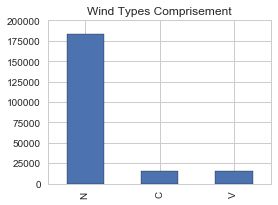

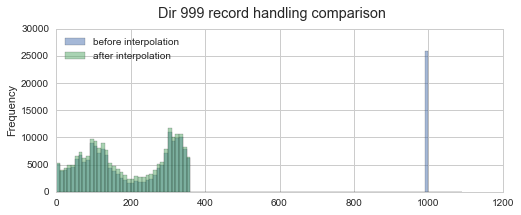

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

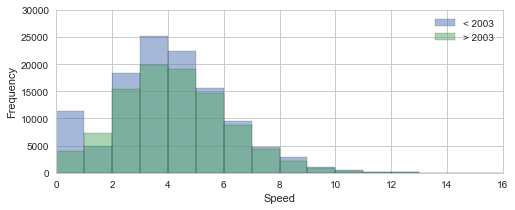

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df[:str(MID_YEAR)]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

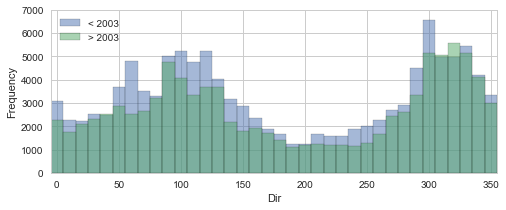

In [22]:
df[:str(MID_YEAR)]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


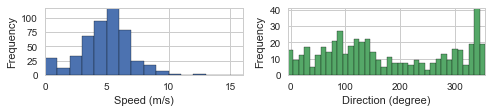

1981 - 1985


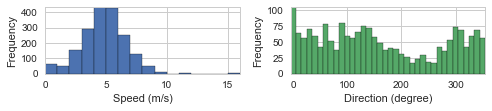

1986 - 1990


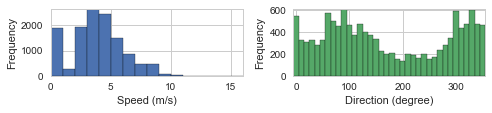

1991 - 1995


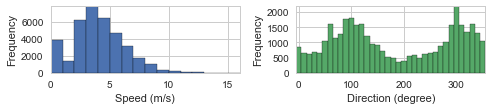

1996 - 2000


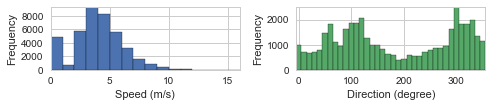

2001 - 2005


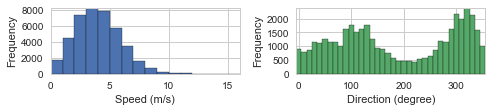

2006 - 2010


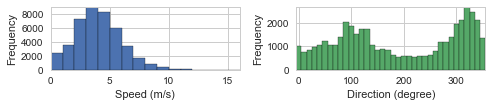

2011 - 2015


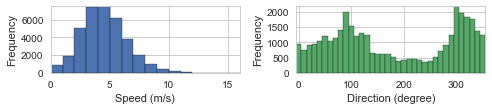

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 6.0)

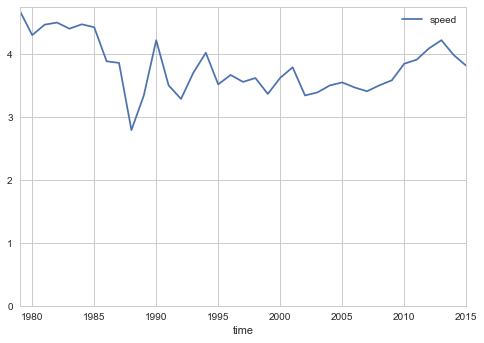

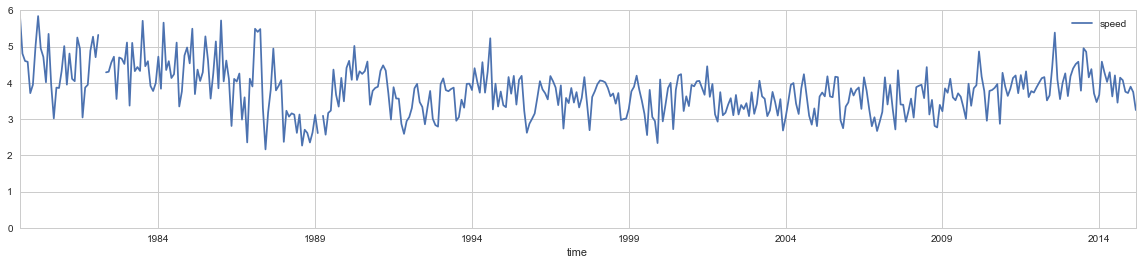

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
%%time
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADg5JREFUeJzt3X1sU/UaB/Bv17J2a/e+qVfc5jbduDC4c07B+EIwThR0
xKAyJMwETNBE0eAGOoUN1rhF+cNIJolxJnNgkOyaG4fX+BIwcBW4wN10Lw64CCvbGLCt7dqedu12
fvePXY4Oe3q6na3ndDyfZAntc+h5KPu25+V3zk/DGGMghExKhNINEBLOKECEyEABIkQGChAhMlCA
CJGBAkSIDBQgFWCM4YUXXsCePXuE52w2G0pLS7Fw4UI88MAD+OCDD8DzvFB3Op0oLy/HokWLsGjR
ImzZsgVWqzXoOpkaFCCFjY6OorKyEkeOHBn3/CuvvILOzk7s3r0btbW1+O6777Bz506hvn37dpw9
exaffPIJ6urqcPbsWbz99ttB18kUYUQxFouFFRcXsyVLlrCCggLW0NDAGGOsra2NZWdns/b2dmHZ
5uZmNm/ePOZyuRhjjOXn57Ompiah/uWXX7K8vDzhsVSdTA36BlJQc3MzMjMz8cUXXyAmJkZ43mKx
wGAwYO7cucJzc+bMgc/nQ1tbGwAgISEBTU1NcDgccDqdOHDgAHJzc4XlpepkauiUbuBGVlRUhKKi
oj89n5KSAo/Hg8HBQSQmJgIAenp6AACDg4MAgKqqKpSVleGee+4BAKSmpuKzzz4TXkOqTqYGfQOp
0IIFC5Ceno6KigrY7XZYrVbU1NRAp9PB5/MBAH777TdkZGSgvr4e9fX1iImJQVlZGdj/hzZK1ckU
UXobkoxZsmSJsA/EGGOdnZ1s2bJlLCcnh+Xl5bGPP/6Y3XfffezgwYOsq6uLzZkzh124cEFYvru7
m+Xk5LBjx45J1snUoU04lcrJycFXX32FgYEBmEwmjI6O4t1330Vqaira2tpgMBiQnp4uLD979mwk
JCTg4sWLGBgYCFhfuHChEv+kGYk24VTIbrfjueeeQ09PD5KSkqDX63Ho0CGkpKQgKysLN998MziO
Q3d3t/B3+vv7YbPZkJaWJlknU4cCpEJxcXEYHh5GdXU1Lly4gCNHjmDHjh14+eWXodFokJeXh9zc
XJSVlaGtrQ0dHR3YtGkTcnNzUVBQIFknU0fDWGj3Kk+dOhXK1YWNjRs3Yvny5Vi6dCkA4MqVK6ir
q8OZM2cQGxuL5cuX49FHHxWWt9vt2LNnD1pbWwEA8+fPx9q1axEbGxtUnYi7++67g15WkQBNpEGl
UJ9Ta6b2SZtwhMhAASJEBgoQITJQgAiRgQJEiAwUIEJkUGQoz8DAQMB6QkICIiIo20T9FAnQP379
RrTmGnJizcKVSEpKCmFHhEyOIgGKiaez4WRmoO0kQmSgABEiw4y7HogxBo7jJJeLjo6GRqMJQUdk
JpMMEM/zqKysxOnTpxEZGQmz2TzuQq0DBw6gvr4eWq0W2dnZqKysVPQIGsdx+Nd/zsNgiBZdxuPh
8EB+BoxGYwg7IzOR5G/6999/D6/Xi88//xyvv/46ampqhJrH48H777+PTz/9FPv27YPT6cShQ4em
teFgGAzRiIoW/wkULkImQvIb6NSpU3jwwQcBAHl5ecJtlQAgMjIS+/btQ1RUFABgZGQEer1+mloN
Ds/zsNus8Ho9osu4OTd4PiWEXZGZSjJATqcTJpNJeKzVajEyMgKdToeIiAgkJycDABoaGsBxHO6/
/37JlV7q7RWtuYacaBluQXx8fDD9/0lfXx/++d+jMAa4cMxps8PVn4ubbrpJdJnY2NiwufiP+lSO
ZIBMJhNcLpfwmOd56HS6cY/fe+89nD9/Hrt27Qpqx/wvt94qWnNEDyHvr3mTPpFqsVhwgutCXFKi
6DK9zILTvAV2jddv3eVw4m8sB4888sikegilmXqhmlImGnLJfaD8/HwcPnwYANDS0oLs7Oxx9W3b
tmF4eBgffvihsCmndqMjoxga5uHwRfj9sXGjGB4eVrpNEgYkv4EKCwvx448/ori4GIwxvPPOO2hq
agLHccjNzUVjYyMKCgrw/PPPAwBKSkpQWFg47Y3LpdPqoJs1y29Nq5txR/fJNJH8TYmIiMCOHTvG
PZeVlSX8ubOzc+q7IiRM0EgEQmQIu20VnucDThRltVpBt38moRJ2AbJardh7/O8wxpr81nvOX4QX
/vdtCJlqYRcgADDGmkQviYg2meB20hE0Ehq0D0SIDBQgQmSgABEiAwWIEBnC7iACYww+rw8+r/9x
bCOjvhB3RG5kYRcgjuPQc9mOWJ//L8++K0OINIbHmDwS/sIuQMDYWDWxcWwROjoHREKH9oEIkYEC
RIgMYbkJN90Yxu738McLCa9Hd/UhAAXIr9GREZy54kRyx2W/dbqrD7mGAiQiclYkoqLp7j0kMNoH
IkQGChAhMlCACJGBAkSIDBQgQmSgABEiAwWIEBkoQITIQAEiRAbJAPE8j23btmHVqlVYu3Yturq6
/rSM2+1GcXExzp07Ny1NhhrjebicDthtgyI/VvA8r3SbRAUkh/L8cYKtlpYW1NTUYPfu3UK9tbUV
FRUVuHzZ/7ixcOR2udHLdyPiiv/Bog6bHXnWFMTExIS4M6I2sibYAgCv14va2lps3rw56JXKmR+o
r68PNrsNoyIDoYeG7NDpZ0E/OCi6Dqllhobs0BujMCxyefjwqBetra24evWq6DpCKVzm3QmXPidC
1gRbACY154uc+YGE+X8S/c//4xq0Q6fXIVGkHswyrkE7uGFOtK5lwPz585GWlia6jlAJp3l3wqXP
iZDcB5KaYIuQG5nsCbYIuZHJmmBr1apVoehRdRjG7g4U6IpVgK5avRHInmDrmoaGhqnrSuVGR0Zw
sqMHlx2RosvQVas3BtqZmSS9PoquWCU0EoEQORT5BhK7Le9YzQdGU8yRMKFIgHqviu98Dw3awXFc
CLshZPIUCZDYbXkBmmKehBfaByJEBgoQITKobntJ6iQlx3GgQwxELVQXIKmTlJaui+BHR0PcFSH+
qS5AQOCTlHp9FDAS4oYIEUH7QITIQAEiRAZVbsLNBIwxGq19A6AATQLjeTiG7LDbxC8btw4OwmYb
REKC/ytrabT2zEABmgS3y40W37/Ra+gWXcba349Fty6mEdsznOoCJPXp7hiyg0UofybIYIqGMU78
rjwejzuE3RClqC5AUp/uvVcsMCXGhrgrQvxTXYCAwJ/uBiNtEhH1UGWAbgTBHKUD6Eid2lGAFOLx
uHHsFxvi4hICLENH6tSOAqQgvYHuqxDuKEDTROpo4pDdhpg4/7cvJuGDAjRNpI4mWvv7sShiMZKS
kkPcGZlKFKBpFOhooptzSY5m4DgODkfgTTy6AYuyJAPE8zwqKytx+vRpREZGwmw2Iz09XagfPHgQ
tbW10Ol0WLlyJZ599tlpbXimCHY0g8NxL1JTM/y/htsF7bA14NE8Ooo3vWTND+Tz+VBdXY3GxkZE
RUVh9erVePjhh5GcTJslwQhmNEOga6Pcbg6/WhyIjPc/N5Pb7UL+nJslj+JRyCZP1vxA586dQ1pa
GuLi4gCMTXVy4sQJPP744wFf0z4gvtniGhqCVq8TXUZuPdjXcHs9074Oqddw2u3o9/ZBH6n3W7fb
B/8/k55VtN7UbYHJJD5yw+vz4J55qYie5qOBfX19sFgsonU1TBUzGbLmB3I6neNmaTMajXA6nZIr
fTJzoXgxUG0q6uGyDgDIDFyenZiIuRni8yDNDjBH0u+i4XK5gjqpK8ctt9wScEIytUxWNlGSAQo0
P9D1NZfLJTntYThMskRIsGTND5SVlYWuri7YbDZ4vV6cPHkSd9111/R1S4jKaJjEcdBrR+HOnDkj
zA/U0dEhzA9

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFThJREFUeJztnXtwVOX5xz97YXPZXEi4SYWgpAVFYLgpOGNl4FelPxD7
m2IJ4KTTqe3odCo6tJmAEEklFOjFzrRlmGq1dQBHGKTWeBmrwhSrRbkKyB1kQxJCkr3fkt3svr8/
lpxklySbhM2es5v3M5OZnPOed89zzu73vO/7vM/7HJ0QQiCRSJKKXm0DJJLBiBSeRKICUngSiQpI
4UkkKiCFJ5GogBSeRKICUngphhCCn/zkJ+zYsUPZ53A4+OUvf8ns2bN54IEH+OMf/0g4HFbKPR4P
zz33HHPmzGHOnDmUl5djt9t7XS5JPFJ4KUQoFKKyspJPPvkkav/TTz/N2bNn2bZtG1u3buXDDz/k
d7/7nVL+q1/9igsXLvDqq6/yyiuvcOHCBdatW9frcskAICQpQU1NjVi2bJmYN2+emDVrlti+fbsQ
QohTp06JCRMmiK+++ko59tixY+Kee+4RXq9XCCHEjBkzRHV1tVL+9ttvi2nTpinb8coliUe2eCnC
sWPHGD9+PHv37iU3N1fZX1NTQ2ZmJpMmTVL23XXXXQSDQU6dOgVAQUEB1dXVuN1uPB4P77zzDpMn
T1aOj1cuSTxGtQ2Q9I5HH32URx999Kb9I0aMoKWlBZvNRmFhIQB1dXUA2Gw2ADZs2EBZWRn33nsv
AGPHjuX1119XPiNeuSTxyBYvxZk6dSrjxo1j/fr1OJ1O7HY7mzdvxmg0EgwGAbh8+TJ33nknr732
Gq+99hq5ubmUlZUhboTpxiuXDABq93UlfWfevHnKGE8IIc6ePSsWLlwoJk6cKKZNmyb++te/ivvv
v1/s27dPWCwWcdddd4krV64ox9fW1oqJEyeKgwcPxi2XDAyyq5kGTJw4kXfffRer1UpOTg6hUIjf
/OY3jB07llOnTpGZmcm4ceOU42+//XYKCgq4evUqVqu1x/LZs2ercUlpj+xqpjhOp5MVK1ZQV1fH
sGHDyMjIYP/+/YwYMYLi4mJGjRqFz+ejtrZWqdPc3IzD4aCoqChuuWRgkMJLcfLz82ltbWXTpk1c
uXKFTz75hBdeeIGf//zn6HQ6pk2bxuTJkykrK+PUqVOcPn2aVatWMXnyZGbNmhW3XDIw6ITQ7gj6
yJEjapugSVauXMmiRYtYsGABAI2NjbzyyiucP3+evLw8Fi1axMMPP6wc73Q62bFjBydPngRgypQp
lJaWkpeX16tySffMnDmzX/U0L7z+XlgykXYmlsFgp+xqSiQqIIUnkahA3OmEcDhMZWUl586dw2Qy
UVVVFeV63rdvH1u3bsVoNLJkyRKWLl3abR2r1cq6detwuVyKy1t6ziSDkbjC++ijjwgEAuzatYvj
x4+zefNmtm3bBkAwGGTTpk3s2bOHrKwsli9fzvz58zl69GiXdX7729+yePFiFi5cyMGDB7l8+bIU
nmRQErereeTIEb797W8DMG3aNCXwFuDSpUsUFRWRn5+PyWRi5syZHDp0qNs6R48e5fr16/zoRz+i
urqa++67byCuSSLRPHFbPI/HQ05OjrJtMBhoa2vDaDTi8XiiIuXNZjMej6fbOnV1deTl5fH3v/+d
P//5z7z88ss888wzPZ4/VaYUpJ2JJVXs7C9xhZeTk4PX61W2w+EwRqOxyzKv10tubm63dYYOHcr8
+fMBmD9/Pn/4wx/iGnjHHXdEbRcUFKDXa8snNBjc38kklezsL3F/wTNmzODAgQMAHD9+nAkTJihl
xcXFWCwWHA4HgUCAw4cPM3369G7rzJw5k3//+98AHDp0iG9+85txDXzrzAfK387P35QpCSRpQdwW
76GHHuLTTz9l2bJlCCH49a9/TXV1NT6fj5KSElavXs0TTzyBEIIlS5YwatSoLusAlJeXs27dOt54
4w1ycnL4/e9/H9fA3KEyekKSfsQVnl6v54UXXojaV1xcrPw/f/58pfvYUx2IRL3/7W9/66+tEkna
oK3BkkQySJDr8SSaQgiB3++Pcs5lZ2ej0+lUtCrxSOFJNIXP5+PUZTuhjOsAtLT4eGDGnZjNZpUt
SyxSeBLNYcrIJCs7W20zBhQ5xpNIVEAKTyJRASk8iUQF5BhPklIIIfD5fDftA6I8n1r3hErh9ZFw
OHxT2FrnN/NIBhafz8d/jn5NZmaH88Vhb0anN5CfXwCkhidUCq+P2O12dn7+Jua8yOoLr8vDPRnF
cWpJEklmZnaU19Pvz0an16eUJ1QKrx+Y83KiY0hb1bNFkppI4Uk0jRDipqVnGk6M12uk8PqIEIJg
IEgwEAAgGAimxQ9Bq7S0+Dl4wqGM3xz2ZjKzc8jW8PitN0jh9RGfz0fddSd5wchMjMvmZGzecJWt
Sm8yMrOU8ZvfnzrjuJ6QwusHBqMR45Ahyv8SSV+Rv5pbRAAtLS1pH00vSSxSeLdIqK2N840ehp9O
72h6SWKJGzIWDod5/vnnKSkpobS0FIvFElW+b98+lixZQklJCbt37+5VnerqakpKShJ4GepiGmIi
Kzsyt9R5Yredds9c5z/pkBncJDWhLcDp06fZs2fPoPrhxUZbyFYxuXQVbaR2trq4wuttQltASWh7
/PjxLuvY7XZefPFFnnvuOSoqKhJ+Mf0h9ktpD//q/KUk4kuKjbaQJI+uoo0en72EYcOGqWZT0hLa
BgIB1q5dy5o1a8jIyOi1gdfq65X/vS4Px1uPM3To0F7Xj4fD4WB/zX/Jzo2IovlaMwaTgYJhkXkj
n9vHvKL7lXM2NDTgcDoI3fCdOJ0OChjBxYsXgci8k6G1nqysLOUcfr+fS3V+MjOzuj0mWWg9Uazf
7wdQ7qfTYUOvN2C12rrc7mpf7P11OBx4fB7aXzzu9Xk4fjyxv6O+krSEtmfPnsVisVBZWUlraysX
L15k48aNrF27tsfzj/7GN5T/3dkupt09LaFPKqvVypWM60oImDnLjNFkZMToUZFzOqLPWVNTwyGf
hfzCQgBEsA3sKDlC/T4f0yeNiupGer1eQhnXO+aiujgmGaRColiv18v5us+U+2mzNqPT6ykoKOxy
u6t9Pq+XCXfkKvfXarVyxdJAbkGkZ5ao39GtPMTiCm/GjBns37+fhQsX9pjQNjs7m8OHD/PEE0+g
0+luqjN16lTeffddAGpra1m1alVc0aUisSFOkD5hTqlCbLRL4/V6gtltKlsVTVIT2g4GYr90SJ8w
p4Egdn2d1+tF0LeHVDgcxut2ob/R/Xc5HeTmD1V6GBkZye/SxyOpCW3bGTNmjDL1oHXC4TA2W8d4
wm63E6/x6hziBDeHOXXVKg7WSfdYj6/D3kxbINinz/C4XXxx/T8MDUS6jvbmZubo5zJsmHZD+eQE
ehx8bi//aHqfYaMiX2Ld11cJMEQpF+EwXo8bpyMizvanbU/EtoqDfXqhs8fX683E43b16X4CZOWY
MedHHH0tLf6BMzZBDHrh3bzaoA2DKfq2mPPMivMlOycHv6djAZ7f66c+XIu+MdJa9fZpG9sqSiJ4
3C7OtZzE3+gBUqP16g+DXnixqw0amlyMyTD06TMyzFkp9bTVOpmD4H4OeuFB7GqDvolOIukPUngq
EOuF8/v8hMMj1DVKklTSSnjJCv+6VWK9cC6bnXEjjYwZM0Y5Rgt2apHYhxaA2+VE6FNrnjSlhBfr
2o8Vls1m473z+8i5MT5orG3AMMSoeCS9Tjf/N+V/oyIWfD5fz7NGQhAIdjhf2kJ9c3V3R2cvnMtu
552zH3GbezQQiZZZNPF/KCzsiM6QQowQ+9ACqG+sIaewI/mUCIdxu5wdnlGXAzFUW8JMKeHFuvZj
hdVY20DesHz

Wall time: 15.2 s


In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF6NJREFUeJzt3X9M1Pfhx/HncQLq/dCyrEmzihGVRGMQOWaX9KS1WUeX
zNUZPbkzNMbqVuOP4go7f4CUWKukX1hLG9bWujQBgbHarL+WbKsxMMWR5hw2osyMObTaWsWm3lEB
PT7fPxpZmRb8wMGd7vX4S9+87+3rLfri7nOfz+cshmEYiIjIbYuLdgARkTuNilNExCQVp4iISSpO
ERGTVJwiIiapOEVETBp3O5N+9rOfYbfbAbj//vt56qmn2Lx5MxaLhZkzZ1JcXExcXBz19fXU1dUx
btw41q5dy8KFC+nu7qagoIDOzk5sNhulpaUkJSXR0tLCzp07sVqtuN1u1q9fP6obFRGJGGMI3d3d
xuOPPz5g7Be/+IXxt7/9zTAMwygqKjL+/Oc/G59//rnxk5/8xOjp6TGuXLnS/+vf/va3RkVFhWEY
hvH+++8bO3bsMAzDMH76058aHR0dRl9fn7F69WqjtbV1qCgiIjFhyJfqbW1tXL16lVWrVvHEE0/Q
0tJCa2sr8+fPByArK4umpiY+/vhj5s2bR0JCAg6Hg+TkZNra2ggEAixYsKB/7pEjRwiFQvT29pKc
nIzFYsHtdtPU1DS6PyFERCJkyJfq48eP58knn2TZsmX8+9//Zs2aNRiGgcViAcBmsxEMBgmFQjgc
jv7H2Ww2QqHQgPFvzr3x0v/G+NmzZwfNEQgEhrVBEZGhuFwuU/OHLM5p06YxdepULBYL06ZNY/Lk
ybS2tvZ/vaurC6fTid1up6ura8C4w+EYMD7YXKfTGfHNjZZAIKAst6Ast6YssZsDhvekbMiX6m+9
9Ra7d+8G4MKFC4RCIR588EGam5sBaGxsJDMzk7S0NAKBAD09PQSDQdrb20lNTSUjI4OGhob+uS6X
C7vdTnx8PGfOnMEwDA4dOkRmZqbp8CIi0TDkM86lS5eyZcsWvF4vFouF559/nnvuuYeioiLKy8tJ
SUkhOzsbq9VKbm4uPp8PwzDYtGkTiYmJeL1e/H4/Xq+X+Ph4ysrKACgpKSE/P59wOIzb7Wbu3Lmj
vlkRkUgYsjgTEhL6y+6bqqurbxrzeDx4PJ4BYxMmTKCiouKmuenp6dTX15vJKiISE3QCvIiISSpO
ERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNu6w7wEnnhcJj29vaI
rCMiY0vFGSXt7e3kbqlh4qR7h73GV19+jn9FWv9NpUVkbKg4o2jipHux3/O9aMcQEZN0jFNExCQV
p4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpJOgL+DGX19nD9/nlOnTo14renTp2O1
WiOQSuTup+K8g10NXqTqoIX9Rz8c0Tpfffk5Vbt8pKamRiiZyN1NxXmH02WbImNPxzhFREy6reLs
7OzkoYceor29nY6ODrxeLz6fj+LiYvr6+gCor69nyZIleDweDh48CEB3dzcbNmzA5/OxZs0aLl++
DEBLSwvLli0jJyeHV155ZZS2JiIyOoYszmvXrrF9+3bGjx8PwK5du8jLy6OmpgbDMDhw4AAXL16k
qqqKuro69u7dS3l5Ob29vdTW1pKamkpNTQ2LFy+msrISgOLiYsrKyqitreXYsWOcOHFidHcpIhJB
Qx7jLC0tJScnh9dffx2A1tbW/vs/ZmVlcfjwYeLi4pg3bx4JCQkkJCSQnJxMW1sbgUCA1atX98+t
rKwkFArR29tLcnIyAG63m6amJmbPnj1k2EAgMOyNRtpIs3R0dEQoSWQcP36cYDA44nXupu9RJCnL
zWIlx3AMWpxvv/02SUlJLFiwoL84DcPAYrEAYLPZCAaDhEIhHA5H/+NsNhuhUGjA+Dfn2u32AXPP
nj17W2FdLpe53Y2SQCAw4iwOhwPe/yxCiUZuzpw5I35XPRJ/L5GiLLcWK1liJQcMr8AHLc79+/dj
sVg4cuQIJ0+exO/39x+nBOjq6sLpdGK32+nq6how7nA4BowPNtfpdJoOLiISLYMe49y3bx/V1dVU
VVUxa9YsSktLycrKorm5GYDGxkYyMzNJS0sjEAjQ09NDMBikvb2d1NRUMjIyaGho6J/rcrmw2+3E
x8dz5swZDMPg0KFDZGZmjv5ORUQixPR5nH6/n6KiIsrLy0lJSSE7Oxur1Upubi4+nw/DMNi0aROJ
iYl4vV78fj9er5f4+HjKysoAKCkpIT8/n3A4jNvtZu7cuRHfmIjIaLnt4qyqqur/dXV19U1f93g8
eDyeAWMTJkygoqLiprnp6enU19ebySkiEjN0AryIiEkqThERk1ScIiImqThFRExScYqImKTiFBEx
ScUpImKSilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJn6tuUjgcpqOjY8BHhQzH
6dOnI5RIRMaaitOk9vZ2Svd9zMRJI/u8oM5PTvKd+2dFKJWIjCUV5zBMnHQv9nu+N6I1vvryQoTS
iMhY0zFOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEpCHP4wyHwxQWFnL69GksFgsl
JSUkJiayefNmLBYLM2fOpLi4mLi4OOrr66mrq2PcuHGsXbuWhQsX0t3dTUFBAZ2dndhsNkpLS0lK
SqKlpYWdO3ditVpxu92sX79+LPYrIjJiQxbnwYMHAairq6O5uZlf//rXGIZBXl4eDzzwANu3b+fA
gQOkp6dTVVXF/v376enpwefz8eCDD1JbW0tqaiobNmzggw8+oLKyksLCQoqLi3n55ZeZMmUKP//5
zzlx4gSzZ88e9Q3LzYy+vohcAhoOhyOQRiT2DVmcP/zhD3n44YcBOH/+PE6nk6amJubPnw9AVlYW
hw8fJi4ujnnz5pGQkEBCQgLJycm0tbURCARYvXp1/9zKykpCoRC9vb0kJycD4Ha7aWpqUnFGydXg
Rba/fomJk9qHvcZXX36Of0Va/78LkbvZbV1yOW7cOPx+P3/5y1+oqKjg8OHDWCwWAGw2G8FgkFAo
NODGFzabjVAoNGD8m3PtdvuAuWfPnh0yRyAQMLW50dDR0RHtCKMiEpeRQmx8j25QlluLlSyxkmM4
bvta9dLSUvLz8/F4PPT09PSPd3V14XQ6sdvtdHV1DRh3OBwDxgeb63Q6h8zgcrluN+6ocTgc8P7I
bvBxN4uF7xF8/Z9SWW4WK1liJQcMr8CHfFf9D3/4A6+99hoAEyZMwGKxMGfOHJqbmwFobGwkMzOT
tLQ0AoEAPT09BINB2tvbSU1NJSMjg4aGhv65LpcLu91OfHw8Z86cwTAMDh06RGZmpunwIiLRMOQz
zh/96Eds2bKFFStWcP36dbZu3cr06dMpKiqivLyclJQUsrOzsVqt5Obm4vP5MAyDTZs2kZiYiNfr
xe/34/V6iY+Pp6ysDICSkhLy8/MJh8O43W7mzp076psVEYmEIYtz4sSJvPTSSzeNV1dX3zTm8Xjw
eDwDxiZMmEBFRcVNc9PT06mvrzeTVUQkJugEeBERk1ScIiImqThFRExScYqImKTiFBExScUpImKS
ilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNU
nCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopTRMQkFaeIiEkqThERk8YN9sVr166xdetWzp07R29v
L2vXrmXGjBls3rwZi8XCzJkzKS4uJi4ujvr6eurq6hg3bhxr165l4cKFdHd3U1BQQGdnJzabjdLS
UpKSkmhpaWH

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGXpJREFUeJzt3X1sU9f9P/C3ncRpsB1oOlVCX+qNUCzBopQ8DDYR0kXa
mm6CliGwsJG7iQdB1sGSleAUElKUrCzqEnWhyygbaJJDklql2qZ2UzdYl5SHZtVtASWQoVkoLU8F
Ar/ia4gTnPP7o4pXNyYJBz/G75cUiZx7k/u5J+bt63vPPVcjhBAgIqL7po11AUREiYoBSkQkiQFK
RCSJAUpEJIkBSkQkiQFKRCRpUgF66tQp2O12AMDZs2dhs9lgt9uxbt06XL9+HQDgcrmwYsUKWCwW
vPfeewCAwcFBbN68GTabDRs2bMCNGzcAACdPnsSqVauwevVqvPbaa5HYLyKiyBMT2Ldvn1i6dKlY
tWqVEEKINWvWiDNnzgghhGhvbxcvv/yyuHr1qli6dKnw+Xzi1q1bgX8fOHBANDc3CyGEePvtt0Vd
XZ0QQohnnnlG9Pf3i5GREbF+/XrR29s7URlERHFnwiNQk8mEPXv2BL5vamrCvHnzAAB+vx/p6ek4
ffo08vLyoNPpYDQaYTKZ0NfXB0VRsGTJEgBAcXExTpw4AVVVMTQ0BJPJBI1Gg6KiIhw/fjxCbw9E
RJGTOtEKpaWluHDhQuD7Rx99FADw0UcfobW1FQcPHsT7778Po9EYWEev10NVVaiqGmjX6/XweDxQ
VRUGgyFo3U8//XTCQhVFmfxeERHdh4KCAqmfmzBAQ/nrX/+K3/3ud9i3bx+ysrJgMBjg9XoDy71e
L4xGY1C71+tFZmZmyHUzMzMntV3ZnQw3RVFYSwisJTTWEr91AA92cHbfV+H//Oc/o7W1FU6nE489
9hgAIDc3F4qiwOfzwePxwO12w2w2Iz8/H52dnQCArq4uFBQUwGAwIC0tDZ988gmEEDh69CgKCwul
d4CIKFbu6wjU7/fjl7/8JWbOnInNmzcDAL71rW9hy5YtsNvtsNlsEEKgoqIC6enpsFqtcDgcsFqt
SEtLQ2NjIwBg165d2Lp1K/x+P4qKivDEE0+Ef8+IKIjf70d/f3/Q6bYvmzNnDlJSUqJcVWKbVIDO
mjULLpcLAPDvf/875DoWiwUWiyWoLSMjA83NzWPWXbBgQeD3EVF0uN1uNBw8jWnTr4xZdvvzq3Du
tsFsNsegssQldQ6UiBLTtOmPwvDw/8W6jCmDdyIREUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ
YoASEUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ4mQiRDQuv98Pt9t9z2UAQk6DlwzT4zFAiWhc
brcb9hfbMG36o2OWDVw4iwzjI2OWJcv0eAxQIprQvabBu/35Z0k9RR7PgRIRSWKAEhFJYoASEUma
VICeOnUKdrsdANDf3w+r1QqbzYba2lqMjIwAAFwuF1asWAGLxYL33nsPADA4OIjNmzfDZrNhw4YN
uHHjBgDg5MmTWLVqFVavXo3XXnstEvtFRBRxEwbo73//e1RXV8Pn8wEAdu/ejfLycrS1tUEIgSNH
juDatWtwOp3o6OjA/v370dTUhKGhIbS3t8NsNqOtrQ3Lly9HS0sLAKC2thaNjY1ob2/HqVOncObM
mcjuJRFRBEwYoCaTCXv27Al839vbi4ULFwIAiouLcfz4cZw+fRp5eXnQ6XQwGo0wmUzo6+uDoihY
smRJYN0TJ05AVVUMDQ3BZDJBo9GgqKgIx48fj9DuEdFkiJERnD9/HufOnRvzdf78+ViXF7cmHMZU
WlqKCxcuBL4XQkCj0QAA9Ho9PB4PVFUNeta0Xq+HqqpB7V9e12AwBK376aefTqpYRVEmt1dRwFpC
Yy2hxUMt/f3991x2x3MNO/ddx7TpYwfMD1w4i0dmzbvv7fX09MDj8dxzeTz0yYO673GgWu3/Dlq9
Xi8yMzNhMBjg9XqD2o1GY1D7eOtmZmZOatsFBQX3W25EKIrCWkJgLaHFSy1GoxF4e+wz4UeNN9ZT
Rk5Ozj0H0sdLnwAPFuT3fRV+/vz56O7uBgB0dXWhsLAQubm5UBQFPp8PHo8HbrcbZrMZ+fn56Ozs
DKxbUFAAg8GAtLQ0fPLJJxBC4OjRoygsLJTeganO7/eH/Fg1+jV6Kx0RRd99H4E6HA7U1NSgqakJ
2dnZKC0tRUpKCux2O2w2G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2AgA2LVrF7Zu3Qq/34+ioiI8
8cQTYd+xqWK82+huf34VjjW5gXPSRBRdkwrQWbNmweVyAQBmz56N1tbWMetYLBZYLJagtoyMDDQ3
N49Zd8GCBYHfRxNL5lvliOIZB9ITEUligBIRSWKAEhFJ4nR2CUyMjODSpUs4d+5cyOXJMKEtUSwx
QBPYHc81ON/T4NBHh8csS5YJbYliiQGa4HiFnih2eA6UiEgSA5SISBIDlIhIEs+BJqHxHlML8Oo9
0WQxQJPQRPfX8+o90eQwQJMUr94TPTieAyUiksQAJSKSxAAlIpLEACUiksQAJSKSxKvwRBR2o49J
vpep8iwvBigRhd14j0meSs/yYoASUUQkw1hjqQAdHh5GVVUVLl68CK1Wi7q6OqSmpqKqqgoajQZz
585FbW0ttFotXC4XOjo6kJqairKyMpSUlGBwcBCVlZUYGBiAXq9HQ0MDsrKywr1vSW28j1DjfbQi
osmTCtDOzk7cvXsXHR0dOHbsGF599VUMDw+jvLwcixYtws6dO3HkyBEsWLAATqcThw4dgs/ng81m
w+LFi9He3g6z2YzNmzfjnXfeQUtLC6qrq8O9b0ltvI9QAxfO4pFZ82JQFdHUIhWgs2fPht/vx8jI
CFRVRWpqKk6ePBk4p1FcXIxjx45Bq9UiLy8POp0OOp0OJpMJfX19UBQF69evD6zb0tIyqe0qiiJT
bkREq5b+/n7pn73XR6jbn3827s/19PTA4/FIbTMZ/0aTEQ+1PMhrKRLioU8elFSATps2DRcvXsQP
fvAD3Lx5E3v37sWHH34IjUYDANDr9fB4PFBVFUajMfBzer0eqqoGtY+uOxkFBQUy5YadoihRq8Vo
NAJvX4nKtkbl5ORITSYSzX6ZSLLWMt5MW3q9Pio1TFY8/X1kSQXoH//4RxQVFeGFF17A5cuX8eMf
/xjDw8OB5V6vF5mZmTAYDPB6vUHtRqMxqH10XSJ6cOPNtMVTN+EnFaCZmZlIS0sDAEyfPh13797F
/Pnz0d3djUWLFqGrqwvf/va3kZubi1dffRU+nw9DQ0Nwu90wm83Iz89HZ2cncnNz0dXVFTfvRDTx
+D3OFRr/ZE/d0P2TCtCf/OQn2L59O2w2G4aHh1FRUYGcnBzU1NSgqakJ2dnZKC0tRUpKCux2O2w2
G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2Bju/SJJE43f41yhRP8jFaB6vR6/+c1vxrS3traOabNY
LLBYLEFtGRkZaG5ultk0RUEyjN8jCgfeC09EJIkBSkQkiQFKRCSJ98KHEZ92SZRcGKBhxKddEiUX
BmiY8Qo2UfLgOVAiIkkMUCIiSQxQIiJJDFAiIkkMUCIiSQxQIiJJDFAiIkkcB3qf/H4/+vv7g2ba
HyX7sLbx7mDiA+CI4hcD9D653W40HDyNadPHPmZDdsZvziJOlJgYoBIiMeM3ZxEnSjwMUCKKKjEy
gkuXLuHcuXMhlyfSpDsMUCKKqjuea3C+p8Ghjw6PWZZok+4wQKNkvIe18UIRJZupMumOdIC+/vrr
+Oc//4nh4WFYrVYsXLgQVVVV0Gg0mDt3Lmpra6HVauFyudDR0YHU1FSUlZWhpKQEg4ODqKysxMDA
APR6PRoaGpC

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

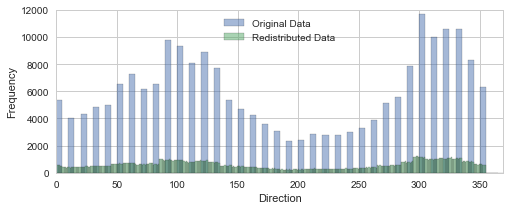

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


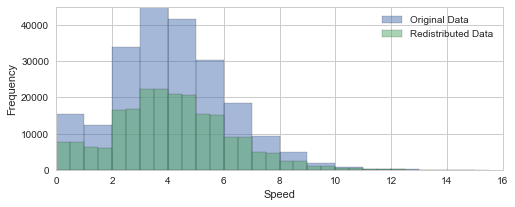

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? False
Report type used: FM-15
Sampling time used: [0, 30]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed  dir_windrose  \
count  3.635200e+04  36352.000000  36352.000000  36352.000000  36352.000000   
mean   2.012661e+07   1149.460827    181.223144      4.540238    206.211653   
std    1.194965e+04    692.188887    113.930649      1.962219    230.381866   
min    2.011010e+07      0.000000     -4.999948      0.001514      0.000000   
25%    2.012012e+07    500.000000     82.564655      3.181972     70.000000   
50%    2.013013e+07   1100.000000    158.972308      4.399567    140.000000   
75%    2.014021e+07   1700.000000    300.690356      5.754565    280.000000   
max    2.015030e+07   2300.000000    354.998805     15.299921    999.000000   

                  x             y  
count  36352.000000  36352.000000  
mean       1.005983      0.485610  
std        3.033387      3.743706  
min      -12.138076    -11.487379  
25%       -0.982324     -2.377867  
50%        1.364572      0.277368  
75%        3.300723      3.433801  
max       15.297765     13.770047

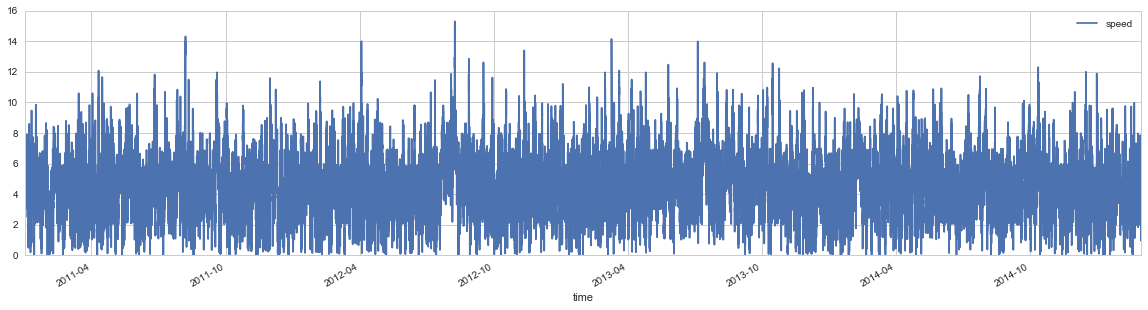

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

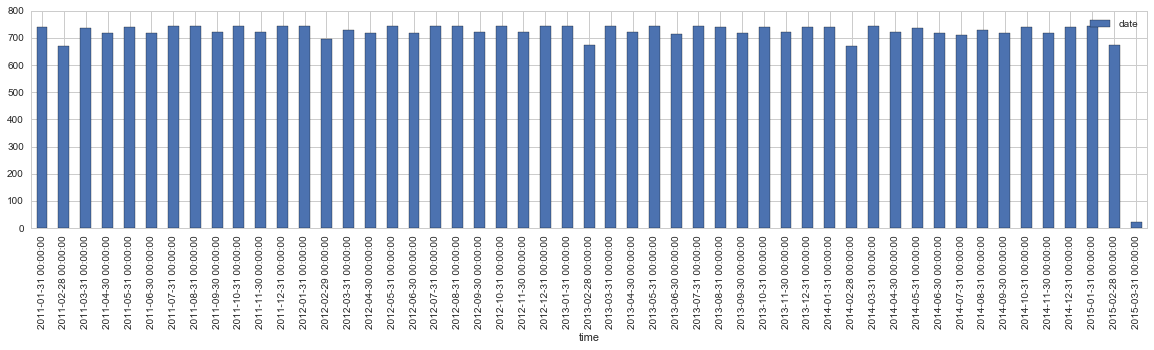

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


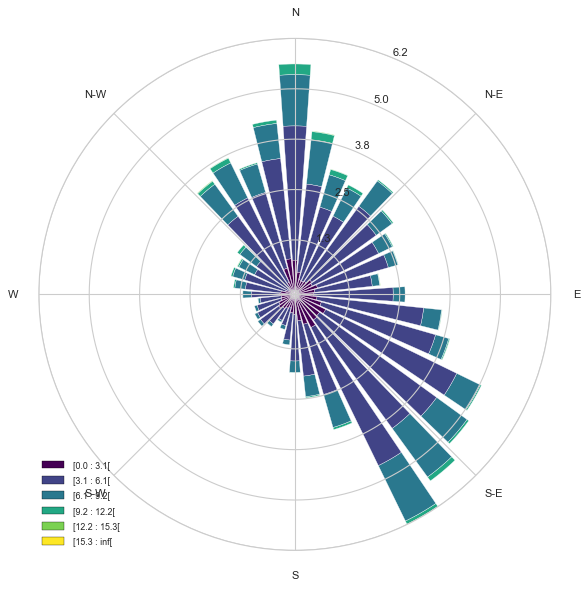

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYE+faBvA7CUQgCYsoKlURsbgrAlYRxYrigriBCIhL
K7XWLh5trVVbK6JFrFVbW9ejVYtaKVir9HOlLrS4QRQBF7SoVMWFgggJSITM9wclxxQIWyaThOd3
XVySzLwzNxN4nOWdd3gMwzAghBAt4nMdgBBifKiwEEK0jgoLIUTrqLAQQrSOCgshROuosBBCtM6E
6wCNJZVKuY5ASJPl5uZW7fsGX1iAmn84XZNKpZRFT3MAlKUmDc2i6T91OhQihGgdFRZCiNZRYSGE
aB0VFkKI1lFhIYRoHRUWQojWUWEhhGgdFRZC9Mz06dORlpYGAFAoFHBzc8O2bdtU06dOnYrr169X
aZeYmIiYmBjcv38fkyZNqvP6Zs+erVpuVlZWI9NXoMJCiJ7x9PRESkoKgIpOaAMHDsSZM2cAAKWl
pXjw4AG6dOlSpZ2XlxeCgoJ0mrUmRtHzlhC2fPzxx4iNjdXqMgMDAxEcHFzj9AEDBmDjxo2YMWMG
zpw5g8DAQHz11VcoKirC1atX8dprryE5ORnr1q2DQCBAu3btEBERgfj4eNy+fRvBwcHIz8/HO++8
g7y8PLz++ut47733sHDhQvj6+sLLywuJiYk4fPgwoqKitPqzVaLCoseUSiWePn3a4LbEMHXr1g23
b98GwzBITk7Ghx9+CA8PD5w9exaZmZkYOHAglixZgr1798LW1hZff/01Dhw4ABOT//05FxcXY/Xq
1bCwsEBoaCiGDh2q05+BCosee/r0KXYdSoFIbFmvdnJZIXq3p49WG1avXo3Vq1drfbka77Ph89Gl
SxckJiaiZcuWEAqF8PLywunTp3Hjxg2EhoZiyZIlmDt3LgDg+fPnGDBgABwcHFTL6NKlCyQSCQCg
Z8+euHPnjto62B7qmn779JxIbAmJpU0DWhZrPQvRHU9PT2zZsgWjR48GUHGj7caNGwEANjY2aN26
NTZu3AiJRILffvsNFhYWePjwoap9VlYW5HI5mjVrhrS0NAQFBeHcuXPIzc0FAFy7do3V/KwVFqVS
ifDwcGRmZkIoFGLFihVqFfXXX3/Frl27IBAI4OzsjPDwcADQ2MZQNfSQJj8/H/QMhaZpwIAB+Oyz
z/Dll18CAIRCISQSCbp27Qo+n49PP/0Ub7/9NhiGgUgkwpdffqlWWKysrDBv3jzk5+fD19cXnTp1
QmBgIBYvXoz4+Hh06NCB1fysFZaEhAQoFArExMQgNTUVUVFR2LRpE4CKXbevv/4a8fHxMDc3x4cf
fohTp06hvLy8xjaGrKGHNE8e3YfEyhaWVg3ZYyGG7JVXXkFmZqbae5V7LAAwcOBADBw4UG26v7+/
6vtDhw5VWWbPnj0RHx9f5f3Kv7Ho6OhGZX4Za4VFKpVi0KBBAAAXFxdkZGSopgmFQuzbtw/m5uYA
gLKyMjRr1gy///57jW0MXUMOaWRFz1hKQwi7WCssMpkMYrFY9VogEKCsrAwmJibg8/lo0aIFgIoq
WVxcDE9PTxw5cqTGNpro0yhy1WUpKCjAo0eFKJKV1GtZuU+eQCAQoqy8fhnksmfo1NxSb7aLvuQA
KEtNtJ2FtcIiFoshl8tVr5VKpVqBUCqVWL16Ne7cuYNvv/0WPB6v1jY10feRuPLy8vBn/s1677Hw
GAUEJkLYtbKvV7uiQnMAxXqxXYxhpDQ2GEMWTkaQc3V1RWJiIgAgNTUVzs7OatM///xzlJaWYuPG
japDotraEEIMA2t7LD4+PkhKSkJwcDAYhkFkZCTi4+NRXFyMHj16IC4uDu7u7pg+fToAYNq0adW2
IYQYHtYKC5/PR0REhNp7Tk5Oqu9v3LhRbbt/t2nKysvLwePX8wQL0arG9H6uiY2N8V/low5yeqpY
XoR1y95HYUEevIZPwJCRgWjr0InrWE1OQ7sK1EQuK8T0se61znfhwgXMnTsXnTp1AsMwKCsrw7Rp
0+Dr61vt/Dk5Obhx4wa8vb21krOxqLDoIWV5OTas+hiPHtyFqbAZjh74AUcP/IBXu/XBkJGB6O81
Es3MzLmO2WQ0vPdz4/Tv3x/r1q0DAMjlckydOhWOjo7o2rVrlXnPnz+P27dvU2EhNYv9YT1SL56B
c3dXhM1dgQd3b+LUkVhkXD6LW9cuI3pzJDy9/TBkZCA6dOrGdVyiAyKRCEFBQTh8+DB2796NR48e
4cmTJ/D29sacOXOwdetWPH/+HH369IFEIsF3330HhmEgl8uxZs0aODo66jQvjceiZ84nHsGhmK1o
1aY9psxaCKGwGfoNGoGFkduwbscJjA95B2bmFkj4dR8+fT8An30wEScP/4SSYnntCycGzdbWFteu
XYOLiwu2b9+OuLg47Nu3DwKBAG+//Tb8/PwwdOhQ3Lp1C6tXr0Z0dDSGDx+Oo0eP6jwr7bHokbtZ
17F1zacwM7fAh0u/g8DUVG16y9avIHD6f+A/5T1cSf4dp47E4nLyGWxfvxS7t67CkJEBCJ35CUfp
CdtycnLQp08fpKen4/z58xCLxVAoFFXma9WqFb744gtYWFjg8ePHcHV11XlWKix6orAgH+uWvY/S
0hLMW/od2nZ4FQ8f3K12XoHABK79h8C1/xDk//0YZ47/jFNHY3H0l2i079gFrv2H6DY8YZ1MJkNs
bCwmTpyIkpISREREIDs7Gz/99BMYhgGfz1eNwbNkyRKcOHECYrEYn3zyCetDJFSHCoseKCt7gfWR
8/D3kxz4T3kf7h51H5SneYtWmDB5Nrx8JmD+W6Pw086v0d2lP4tpmx65rJCTZZ0/fx5Tp04Fn89H
eXk5PvjgAzg6OuKjjz5CamoqhEIhHBwc8OTJEzg7O2PTpk3o3r07xo4di9DQUJibm6NFixZ48uSJ
1vLXFRUWPbBn65e4nnYR7gOGYcLk2Q1ahm3L1vD1fwO//LgZCb/+iO5v1zz0Iak7GxubOl0eru8y
7969q3Gefv364dy5c9VOq+7O5VatWuHYsWMAoBrDhUtUWDh2+th+HD+0G20dOuGd+VHg8xt+Pt0v
8C2cOhqH4wf3YEqAjxZTNl18Ph+2trZcxzA4dFWIQ7eup2LHd8sgElvhw6UbYG4hatTyzC1EmDj1
A5SWlmDnzp3aCUlIA1Bh4cjTvCf4evmcimPnxWvQyr69VpY7eIQ/7Ns54tixY0hPT9fKMgmpLyos
HFAoSrFu+QcoyM/F5LCP0dPVU2vLFghM4D/lfSiVSsyfP19ryyWkPqiw6BjDMNjx7TJk3UiDp/cY
jPKfrvV1dHfpDzc3Nxw/flx1Qo8QXaLComPHDu5G4okD6PhqD7z1nwjweDytr4PH42HWrFng8XiY
P38+ysvpDmmiW1RYdCj30QPs2boKVjYtMPfzbyFsZsbaujp27Ig333wTGRkZ2LFjB2vrIaQ6VFh0
6Mzx/VAqyxH05oewbdma9fUtX74cFhYWWLJkCWQyGevrI6QSFRYdUSrLceb4AZhbiNHPawTL61Li
2bNnaNasGd577z08evQI4eHhyMvLq/WLHs1KtIE6yOnItSsXkf/3I3j7BsHMzILVdRXLi/D7vXzk
lt9E254jYWWzA+u//Q4tXvWCTfOWNbarHISIOoSRxqI9Fh1J+q3iQVGvjwjQyfrMLcSQWNqghZ09
Jk3/D14oSnFk/05ILG1q/NLWKGmEUGHRgdzcXFyR/o72jp3R0bmHztfv5TMB7R074/eEX3A367rO
10+aHiosOhATEwNleTkGjwhg5fJybfgCASbP/BgMw2Dvf7/k5DZ60rRQYWEZwzDYs2cPTEyFGDh0
DGc5erp6opf

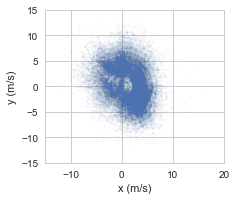

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEUVJREFUeJzt3XlQU2fbBvArYakUUFAUnVZUpJSisriAfgiMOpRaRgW1
igh2RK1lplPRsQW1IAgq2mrHcQAXpGK0LkWwjttYGZV3XAtilcUl+Ip9W9lkS9hJnu8Py6kRTIIn
EBLu3wwz5uQ+OfdDvMxZnngEjDEGQshbEWq7AUJ0GQWIEB4oQITwQAEihAcKECE8UIAI4UGvAtTa
2opNmzbB3d0d7u7u2L59O2QymcbqAUAqlWLWrFmoqal5Y010dDQ+/PBDhZ9Nmza9sf7x48dYvHgx
nJ2d4efnh+zsbNWDVWHZsmUdejhw4MAb63NychAQEAAnJyfMmzcP9+/f5567ePEi1q1b99a9PHr0
CGPHjsWtW7e4Za/31v7Tvp22tjb88MMPmDp1KlxcXLB8+XI8efLkrXvoNkyPJCQkMB8fH5aXl8eu
XbvGPDw8WGJiosbqGWMsLi6O7dmzR2lNYGAgS0pKYuXl5dyPRCLptLaxsZF5eXmxqKgoJhaLWWJi
Ihs3bhx7+vSp6gEr4enpyTIzMxV6aGho6LS2tLSUubq6sl27djGxWMxiYmKYu7s7q62t5WrmzZvH
bt261eU+2tra2Ny5c5m9vT27efMmt/zVvsrLy9nJkyfZmDFj2P379xljjP3444/M29ub3bhxgz15
8oStXr2aTZ8+nbW2tna5h+6kNwFqampizs7O7NKlS9yyjIwMNmXKFCaTyXjXM/byTXdxcWE1NTVK
e3Fzc2NXr15Vq+/MzEw2ZcoU1tLSwi0LDg5mCQkJaq3fGYlEwuzt7ZlYLFarfvfu3czf3597LJfL
2YwZM5hIJFLoMzg4uMu9JCcns8WLF3cI0Kvq6+uZp6cnS05O5pbt2LGDXbx4kXtcVFTE7O3t2bNn
z7rcQ3fSm124oqIiNDY2ws3NjVs2ceJEvHjxAs+ePeNdDwDHjx+Hq6srBgwY8MY+KioqUFNTg1Gj
RqnV9507d+Dq6gojIyNu2aRJk5CXl6fW+p0Ri8UwNDSEjY2NWvV5eXmYNGkS91ggEGDChAkKPUyb
Ng15eXl4+PCh2n08fvwYaWlpiI2NVVr3008/wcjICKGhodyyNWvWwMfHBwBQW1uLQ4cOYeTIkRg2
bJja2+8JehOgsrIymJiYwNzcnFs2ePBgAEBpaSnvegC4cuUKPD09lfYhFoshEAiwf/9+eHt749NP
P0Vqairkcnmn9eXl5RgyZIjCMisrK5SVlSndjqoezMzMEBkZialTp2LOnDnIzMx8Y706PQwYMADj
xo3D1atX1epBJpMhMjISq1atwtChQ99Y19TUhLS0NKxcuRLGxsYdnk9JSYGbmxvOnDmD2NhYGBoa
qrX9nqI3AWpsbMQ777yjsKz9DWlpaeFdL5PJUFhYCDs7O6V9PHnyBEKhEDY2Nti3bx9CQ0ORmJiI
lJSULvXdWQ/qKi4uRlNTE6ZMmYKUlBT4+/sjKioKZ8+e5dWDnZ0d8vPz1eohJSUFZmZmWLhwodK6
M2fOQCgUYs6cOZ0+7+vri4yMDAQEBCAsLAzFxcVqbb+n9K4489CvX78Ob3j7YxMTE971NTU1kMlk
sLS05JYtX74cubm53OOzZ88iKCgIfn5+sLCwAPDybFNtbS0OHjyIL774Qu0++vXr1+k4/fz88Pff
f3OPO9vVW7t2Lb788ktuV9PBwQF//vknRCIR/Pz83roHCwsLtc6EicVipKamIj09HQKBQGntuXPn
MHPmzA4Bbjd8+HAAQExMDHJzc5Geno6IiAiVPfQUvQnQ0KFD0dDQAKlUCjMzMwAvj0cAwNramnd9
+1+EV3fFNm/ejKamJu7xkCFDIBAIuPC0s7OzQ2VlJWQyGQwMDBSes7a25rbbrqKiotMeAGDfvn1o
a2vr9Ll2BgYGHY7TRo8ejStXrnRar24PMpkMQqHqnZYLFy5AIpFg9uzZCstXrFgBf39/7pR+Q0MD
bt++jRUrVijUyeVyXL58GWPHjuV6EAgEGD16NKqrq1VuvyfpzS6cg4MDTExMFD4RcnJyYGVl1enB
dFfrLS0tYWhoqPAGWltbY8SIEdyPoaEhNm/ejKVLlyqsm5+fj5EjR3YIDwC4uroiLy9PIRQ5OTlw
dXXtdJzvvfeewjY789VXX2HDhg0KywoKCmBra9tpvaurK3JycrjHjDHu5MarqqurueNEZYKDg3H+
/HmcOnUKp06dwtGjRwEA8fHxWLVqFVdXWFgIxhjGjx+vsL5QKMSmTZuQkZHBLZPJZCgqKlK5C93j
tH0aUJPi4uLY9OnTWU5ODrt+/Trz8PBQuGZTXV3Nqqur1a5/3fz589nevXuV9nDz5k3m4ODA9u7d
y0pKSlhmZiZzcXFhv/76K2Ps5XWR8vJy1tjYyBhjTCqVMg8PDxYZGcnEYjFLSkpiTk5OvE7XZmZm
MkdHR5aens5KSkrYwYMH2ZgxY9jvv//OGGOsubmZlZeXs+bmZsYYY8+fP2fOzs5sx44dTCwWs9jY
WDZ58mRWV1en8LoBAQEsNTWVMfby+lV5eTlra2tT2Y9UKu30NPbhw4fZxx9/3Ok6+/fvZ+PHj2e/
/fYbE4vFLDIyknl4eHToSdsEjGnvC3Wv/uuvCS0tLUhLS8PNmzdhZGQELy8vBAYGcrsdcXFxAICo
qCi16l+XkZGBx48fq9wHv337NjIyMvD8+XNYWlpi1qxZmDFjBoCXu0arVq3CypUr4e3tDQB4+vQp
UlNTUVJSAmtrawQHB8PJyYnX7+LSpUs4f/48KisrYW1tjc8++4w7VV1YWIj4+Hh89913cHR0BPDy
U/LQoUMoKyuDjY0Nli5dqvCJ1dDQgJUrV2L79u0YNmwYrl69ir1792LXrl0qP5WampoQGhqqsD0A
+OWXX3D//v1OZ2nI5XKcOXMGWVlZqKmpgb29PT7//HO8//77vH4vXTFhwgTVRdpMb05OjjY332Wl
paXM2dmZVVRUqKzVtbGpcuzYMbZkyRKFca1YsUKt34WueHVs6r5/enMM1BOsra0REBCA48ePa7uV
HsUYw9GjRxEWFsYtu3PnDoRCIaysrLTYmfZRgLpozZo1OHfunNLJpPrmwoULsLe3x+TJk7llTk5O
SE5O1mJXvYPenMbuKebm5m+8IKmvZs6ciZkzZyos620zArSFPoEI4YECRAgPFCBCeKAAEcIDBYgQ
HtQK0IsXL+Dt7Y3i4mKUlJRg0aJFCAoKwsaNG7nJlSdOnMDcuXOxYMECXL58uVubJqS3UBmg1tZW
REdHc1Pbt27divDwcPz8889gjCErKwsVFRUQiUQ4duwYDhw4gJ07d/L6PgshukJlgLZt24bAwEDu
G4sFBQXc16C9vLxw/fp13Lt3D66urjA2Noa5uTlsbGzw4MGD7u2ckF5A6dWwjIwMDBw4EJ6enti3
bx+Al9M62r8bY2pqColEAqlUqvDVaFNTU0ilUrUa0PSE0t5EX8emr+MCuj42pQE6efIkBAIBbty4
gaKiIkRERKCqqop7vr6+Hv3794eZmRnq6+sVlr8aKGXUmvGqg3Jzc/VybPo6LkBxbOoGSeku3JEj
R3D48GGIRCJ89NFH2LZtG7y8vLj/IC87OxsTJ06Ek5MTcnNz0dzcDIlEguLiYtjb2/McDiG9X5cn
NEVERCAqKgo7d+6Era0tfH19YWBggJCQEAQFBYExhtWrV7/xO+6E6BO1AyQSibg/Hz58uMPzCxYs
wIIFCzTTFSE6gi6kEsIDBYgQHihAhPBAASKEBwoQITxQgAjhgQJECA8UIEJ4oAARwgMFiBAeKECE
8EABIoQHChA

Wall time: 6.02 s


## 2.3 Overview by Month

In [41]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4W+X59z/aw1qWLXnvmUkGCWSHAEkgUEJYhZa2jLa0
BdpCC6UthA0t/IAW+pZSZltmy54hJIQEMkgImU7seC95SbKsvd8/hJQo3onsOK2/16Xrss94zqOj
8z33vh9BOBwOM45xjOOkgPBET2Ac4xjH0DFO2HGM4yTCOGHHMY6TCOOEHcc4TiKME3Yc4ziJME7Y
cYzjJMI4Yf8HMB65++/BOGFHAUuWLKGsrIwHH3ywz/0tLS2UlZVRVlaGxWJJ6LU/+eQTVq9eHfv/
8ccfZ/r06Qm9hsPh4IwzzuCjjz5K6Ljj6I1xwo4SBAIBa9eu7XPfmjVrRuy6L7zwAu3t7SM2vsPh
4Kc//Smtra0jdo1xHMY4YUcJ06dPp7m5mYqKil77PvroI8rKyk7ArI4PX375JZdccgkHDx480VP5
n8E4YUcJEyZMICcnp5c0bW1tZe/evSxfvrzXOWvXruWiiy5i2rRpLFq0iMcee4xAIBDbv2TJEv7+
97+zevVqZs+ezYwZM7j11ltxOBwAXHnllXz55Zds2LCBsrIympubY+d+8MEHLFu2jClTprBq1Sp2
7twZ29fc3ExZWRmPP/74gN/pZz/7GaWlpTz99NPHdE/GMXyME3YUsXTp0l5q8Zo1azjllFNIT0+P
2/7qq69y/fXXM3XqVJ544gm++93v8uyzz/Kb3/wm7ri//e1v9PT08Mgjj/CLX/yC999/n7/+9a8A
rF69mokTJzJjxgxeffVVjEYjAG63m0cffZQbb7yRP/3pT7jdbm644YbYy8BoNPLqq69yySWXDPh9
XnzxRf70pz+h1+uP676MY+gQn+gJ/C9h+fLlPPPMM9TU1FBUVARE1OFzzjkn7rhgMMhjjz3GihUr
Yg6j+fPno1arWb16Nddeey3l5eUApKen88gjjyAQCJg/fz6fffYZTz/9NLNnz2bRokWoVCqUSiU3
3XQT//jHP4CI1/ihhx5i2rRpAAQCAW644Qaqq6spLy9HKpXG9g2E0tLShN2bcQwN4xJ2FDFlyhQy
MjL4+OOPATCZTOzZs4dly5bFHVdbW4vFYumlJq9YsQKAHTt2xI0pEAhi/xsMBiAiXe12e5/zEIlE
TJ06NfZ/VlYWQL/Hj2PsYJywowiBQBCnFq9Zs4apU6eSkZERd5zNZgMgJSUlbrtarUYqlcZsVACF
QtHrGiKRiPnz5/PAAw/0OQ+ZTIZQePinj/4dCoWO8ZuNY7QwTthRxtKlS9m/fz/Nzc2sWbOmlzoM
oNPpADCbzXHbe3p68Pl8sf0D4Te/+Q1btmyhu7s7MRMfx5jAOGFHGTNmzMBgMPDKK6+we/fuXuow
QEFBAcnJyb0SET744IPYGINBpVJxzz33UF9fH+dZHsfJjXGn0yhDKBRy9tln8/zzz8ds2qMhEom4
/vrrueeee9BqtZx55plUVlby+OOPs3z58iE7e+bPn4/BYODrr79GoVDg9XqHdJ7P56OiooL09PRe
3utxnFiMS9gTgKVLl+L3+/uMvUbx3e9+l/vuu49t27Zx3XXX8eKLL3LVVVfx8MMPD+tad999N263
m66uLqqrq4d0TkdHB5dddhn//ve/h3WtcYw8BOM9nf670NzczPe+9z3Wr18f2/b5559zzTXXsG7d
OrKzs0/g7MZxvBgn7DjGcRJhXCUexzhOIowTdhzjOIkwTthxjOMkwnhY578AoVCIYDAY6ywRDodj
fwsEgriPSCSKS2U8EXj77bd56qmnAFi4cCG33nprbF97ezs/+tGPYv87nU7a29vZtm0bSqVy1Oc6
1jDudBrDCIfD+P1+fD4ffr8/9vF6vYe3BfyEQ8P7CUUiIRKJFIlEglQqRSqN/B39yGQyxOKReZe7
3W4WLVrEhx9+iFar5fLLL+eXv/wlc+fO7XVsOBzm2muvZenSpVx22WUjMp+TDeMSdowgHA7j8/lw
uVw4nU6cTicul4tQKIRQKIx9xGIxYrEYhUKBVqvloOtLttvX4MGODw9hgiAEcVjKtwK/5h3xQwTC
PkRIkKJAiZYl+svRiYz4fL7YNQOBAKFQiFAoRDgcRiKRoFQqY9U+SqUyISQOBoOEQiE8Hg8qlYpg
MIhMJuvz2HfffZdAIDBO1iMwTtgThEAggN1u70VOsViMRCJBoVCQkpKCVqtFIpH0O05lux+/24FW
okcpUiEVKhAL5YhDUrBCmXoWPpx4g24cQRs2XztKnYwsTVaf44XDYdxuNzabDafTSVdXF36/n1Ao
FEfipKQkVCrVsNVrlUrFz3/+c8455xwUCgWzZs3qM9UyFArxl7/8ZdiJIv/tGCfsKMLr9dLd3Y3V
asXpdCISiWIkMBgMaLVaRCLRsMYUBKfS45JR73Fh83mwB7wEQiEkCLgnDV6uVINQi0YiQyuVo5cn
EQgY+x9PIIhJ1CPh8/mwWq309PTQ2dlJa2srAoEArVaLTqcb8twPHjzI66+/zqeffopareZXv/oV
zzzzDNdee23ccZs3b8ZoNDJlypRh3Y//dowTdgQRDodxuVxYrVa6u7vxer1IJBJUKhVZWVmo1erj
vkaHx8V/6vb02q4QiCAN6uwW3OFg3L4rigYvHjgaUqmUtLQ00tLSgIgEtFgsmM1mGhsbCQaDJCUl
odfr0Wq1/aq5n3/+OXPmzImVDq5atYqXXnqpF2E/+eQTzjvvvGHP878d44RNMMLhcEyV7O7uJhQK
IZPJ0Ol0pKWlDajeHguUYumwz0k6hnOOhlAoJDU1ldTUVCDize3o6KCtrY2mpiZkMhnJyckYDAak
0sPXKy8v5w9/+APXX389SqWS9evXM2nSpF7jf/XVV3z/+98/7nn+t2GcsAlCMBjEarXS3t6O1+tF
JpORnp6O0WiMKxZPNIZLWKlQhCIBhD0aSUlJFBQUABHVv729HbPZTFtbG1qtFqPRiFqtZv78+VRU
VLBq1SqkUimTJ0/mRz/6Eb/73e9YsmQJZ555JgBNTU1kZmYmfJ4nO8bDOscJj8dDR0cHXV1dCIVC
dDodWVlZCZek/WFbRwNXfPqvXtsVAhEvFJ3N92vWxqnERrmKtedeh0rSt8qaaDgcDlpaWnA6nYjF
YtLS0khJSRmxsNF/O8bv2jEgHA7T3d1Ne3s7TqcTuVxOXl4eer1+1JMShqve6mSKY1KjjxUqlYqy
sjKCwSAmk4m2tjZaWlrQ6/UYjcbxZIhhYpyww0A4HMZisdDS0kIwGESlUjFp0iTkcvkJm9NwyZel
1CA8AZlOIpGI7OxssrOzsVqttLa2cuDAAVQqFdnZ2SQlJY36nE5GjBN2CAiHw/T09NDU1ITf7yc5
OZmcnJxhh2BGAgqxBJFAQHCIlk26UjvCMxocycnJJCcn43a7aWho4ODBgzFT4kS+/E4GjBN2EDgc
DpqamnC73eh0OvLy8sYEUaNQiiVopQosXteQjtdKxw4hFAoF5eXluN1u6urq2L9/PykpKWRmZsZ5
lsdxGOOE7Qdut5vm5mbsdjtqtZopU6aMmiNpOFCKpWQnaUmRJZEiU6CSyFCIpJE4LLA8q4zuoI8e
n4curxOtZOwQNgqFQsHEiRNxOBzU19ezb98+jEYj6enp486pozB+N45CIBCgqakJi8WCUqlkwoQJ
vXr/jiVIhCIuVJ7C1uomul1uTB43/qATiUDAxYszqdneAwIBarmCKUl6SgT9ZzmdaKhUKiZPnozF
YqG5uZnOzk4yMjJIS0s74RVGYwXjhD0CVquVhoYGhEIhJSUlaDSaEz2lIeFgayefHayL2yYXRyRs
o9mGJ3A4rLO

Wall time: 18.5 s


In [42]:
df.describe()

date          HrMn           dir         speed  dir_windrose  \
count  3.635200e+04  36352.000000  36352.000000  36352.000000  36352.000000   
mean   2.012661e+07   1149.460827    181.223144      4.540238    206.211653   
std    1.194965e+04    692.188887    113.930649      1.962219    230.381866   
min    2.011010e+07      0.000000     -4.999948      0.001514      0.000000   
25%    2.012012e+07    500.000000     82.564655      3.181972     70.000000   
50%    2.013013e+07   1100.000000    158.972308      4.399567    140.000000   
75%    2.014021e+07   1700.000000    300.690356      5.754565    280.000000   
max    2.015030e+07   2300.000000    354.998805     15.299921    999.000000   

                  x             y  
count  36352.000000  36352.000000  
mean       1.005983      0.485610  
std        3.033387      3.743706  
min      -12.138076    -11.487379  
25%       -0.982324     -2.377867  
50%        1.364572      0.277368  
75%        3.300723      3.433801  
max       15.297765     13.770047

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


In [45]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [47]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

0.6
Wall time: 0 ns


In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.6 289
[  6.36570109e-09   1.27543933e-07   3.20984582e-06   1.18119861e-05
   3.06933907e-05]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl0LHd9J/qp3hepte+7dG2DbQxcG8MEGJ+Y+BgcSIZx
BuO8LBDPy4QQQsAEvGKDfcFsZjIxx/NwArx37RPbzy95xoHMCYuBhMdic8dZbMPkqiW1uqVe1N1q
9d5dy/tD/paqq2vvktQt1+ece+x7VfXrX6mrPvVdP19GEAQBDhw4cHBC4TruDThw4MDBYcIhOQcO
HJxoOCTnwIGDEw2H5Bw4cHCi4ZCcAwcOTjQcknPgwMGJhkNyDhw4ONFwSM6BAwcnGg7JOXDg4ETD
ITkHDhycaDgk58CBgxMNh+QcOHBwouGQnAMHDk40HJJz4MDBiYZDcg4cODjRcEjOgQMHJxoOyTlw
4OBEwyE5Bw4cnGg4JOfAgYMTDYfkHDhwcKLhkJwDBw5ONBySc+DAwYmGQ3IOHDg40XBIzoEDByca
Dsk5cODgRMNz3BtwcPwQBAGNRgMsy8LtdsPr9cLlcoFhmOPemgMHHYMRBEE47k04OD7U63UUCgX0
9/ej2WwCALa2tjA0NIT+/n64XC6H9Bz0NBxL7mUMjuNQrVaRyWQQDofBsiy8Xi8EQYAgCOA4DizL
otFogGEYuN1uh/Qc9BwcknsZQhAEsCwLjuPAMAw4jsPq6io4joPH4wHP86hUKvD7/fB4Dm4RIr16
vQ6XywW32w232w2Px+OQnoOuheOuvszA8zyazSboa9/e3kYul8P8/Dx8Ph8ajQaSySQYhkGz2YTH
40EoFEIwGEQoFILb7W5Zj9ZhGEYkO4/H03acAwfHBceSe5mA3E+O4wAALMsiHo+D53l4vV709/ej
0WggEAjA6/ViYGAA4XAY9XodlUoFhUIBqVRKJD0iPimZsSwLQRBQr9eRTqcxMTEBn8/nkJ6DY4VD
ci8D8DwPlmXB8zwYhkGxWEQikcDw8DAikQhisVjL8QzDQBAEMAyDQCCAQCCA4eFhCIKAWq2GarWK
3d1dJJNJeL1ekfCkpFcul9FoNETSI/fWsfQcHDUckjvhoDgaJROSyST29vYwNzcnWmpGIxYMw4hk
JiW9SqWC3d1dbG9vw+fzIRQKQRAEkVSBgzigQ3oOjhoOyZ1Q8DwPjuPA8zwAoNFoYHNzEz6fDysr
K2JCoZNkgZT06DPJ0uN5Hpubm/D7/WI8LxgMwuXarz93SM/BUcEhuRMInuexs7ODQqGA+fl55PN5
JJNJjI+PY3h4uI3Y5JYcuatm4XK5xHjd3t4epqamxExtLpdDrVaD3+9vcW+1SK9UKiESicDv9zuk
58AyHJI7YSD3FNgnjng8jmq1iqWlJQQCgbbjD7Psw+VyIRAIIBQKAdgn32q1imq1imw2i3q9jkAg
IFp6gUCghfTS6TQ8Hg9YlnUsPQeW4ZDcCYG89q3ZbKJUKmFwcBArKysieaidCxwu4QH7pBcOhxEO
hwEckF6lUsHOzo5IemTpUfKDLEs199bn8zk1eg5U4ZDcCYC89m1nZwfpdBo+nw8zMzOa5yqRg1V3
1SzkpEcdGNSFwbIskskkwuGwaOnpJTKo99YhPQcEh+R6HGS9AfskkUgkwLIsJicnsbe3Z2iNbqkH
d7vd6OvrQ19fHwAgGo0iEomg0WggnU6j2Wy2WHpKpNdsNlGr1UTSYxgGXq/XcW9fxnBIrkchd09L
pRLi8TgGBwcxPz+PcrlsiLzULB47iK/TNRiGQSgUwuDgIIADS69SqSCVSoFlWZH0QqEQ/H5/G+lt
b2+LaziW3ssTDsn1IKS1bwCQSqWQz+cxMzOD/v5+8TirJGMHARwGicgtPZZlRdJLJpNgWbalXMXv
94t7UbP0HNI7+XBIrocgCAKy2Sy8Xi8CgQCazSbi8TgYhsHKygq8Xq94rNGH9qjib4cBj8eD/v5+
kdilpLe7uwuO48SEi9/vb0lQSEmPYnpEfA7pnSw4JNcjoNasfD4vxqkSiQRGR0cxOjra9lB2Sl69
SHxKpLe1tSX+l+O4FrEBKenxPC8mcKSk5/F44PF4HNLrYTgk1wPgOE4UtASAfD6PRqOBhYUFsQbN
KogMy+UyCoWC2L1wEkAERcTXbDZbLD2e50XCC4VCLRaclPSazSaKxSImJiYc0utBOCTXxZAnF2q1
GkqlEvx+P06dOqWZMTRqydEx8XgckUgEu7u7qFQq8Hg84DiurTOhl+H1euH1ehGJRAAAzWYTlUoF
1WoVuVwOgiC0WHpEeizLolKpiO4twzCOpddDcEiuSyFVDgGAXC6HVCqFQCCAgYEB3ZIIIyTXbDax
ubkJAFheXhb/PZ1Oi58r7Uwgi0dautHLIEmpgYEBCILQYunlcjkAQDAYFIVEqTgZaLX0HNLrbjgk
14WQ1r7xPI+trS3UajUsLS2JD1+nkMotVSoVeL1e0SVmGAY+nw/Dw8PiHujhl9eryUs37IRdZSxG
9kbX7PP5WkivUqmgWCyiXq9jbW1N0dIDHNLrZjgk10WQu6eVSgWbm5vo7+8XW7OMuqFqxwmCgFQq
hd3dXczOzqKvrw+ZTEZzTaXOBHLz5KUbFNCnz+oUx0UOUtLzer3I5XKYmJhApVJBuVzGzs4OXC5X
S8mKGukB++Uv9HI4rJeCA2U4JNclkNe+ZTIZ7OzsYHp6GgMDA5bWlJMMuaculwunTp1qmd8ghR6R
ut3utixmpVJpCegLgoBSqSQOvunlh1oQBLFH1ufzYXBwUBzjWKlUUCqVkE6n4Xa7W8heasHxPI90
Oo1wOIz+/v6WoUDUmeHgcOCQ3DGDMpvb29uYn58Hx3GiLPnKyopoFRHMWHJSkHs6MjLSVnLSabmJ
x+NBJBJpCehvbm6iVquhUCiInQtSi+eoYNRdNQuGYeD3++H3+zE0NNRCesViUSQ96XVLBQeULD0a
CuSQnr1wSO4YQckFmoBFRDQ0NITx8fGOmufpOHJPC4WCqAZ82CDrZHR0FH6/X4xtSS0e6cOvZlF2
C4wQpRLp1et1VKtV7O3tIZVKiWrJwEFCQ+7eNhoNAGgbCuSQnnV09911giF1T0kaKZFIiHEyNZix
unieRzQahdvtblEDVltT/l87II1tyd08evi1huN0A6z8LqTzMYj0YrEYPB5P21Ag6SQ0IjMaOiSf
eeuQnnk4JHfEUNJ9i8fjEARBM04mX0MPpVIJPM8jEokodkQcF5QsHulwHOmcCLJuOoFd7mqna1DG
NRKJiDMw6LoLhQKSySR8Pl9LIkON9La3tzE1NdUyCa1bvt9uhENyRwj51KxCoYCtrS0MDw+LM071
oHcz8zwvuqcMw2BsbMzQ3o6rjUs+HIfmRFQqFfA8j1gspqoefFQ4jLiemaFA0kloDMOgWq2KXTCO
pacPh+SOCNLaN0EQsLW1hXK5jMXFRbFEwQi0XEkaVuPxeLC8vIzz588bXlP+904tKMAaccrnRMzM
zIjZ20wmg0aj0WLt9FJhshZZag0Fyufz2N7eFocCUfaazgMc91YLDskdMpRaszY3NxEMBrGysgK3
2w2O40yNBVQ6lqzCsbExjIyMiEkHM/vsxgdBTT1Yqiknr9GTXsdRFhTbuY6U7EdGRlosXEEQsL6+
rjgUSEp6LMs6pAeH5A4V8sb6bDaLdDqNyclJDA0Nif9uJtAvP5bneSSTSRSLxbaGfTNr2g27SEEO
LU05pab7biLvTvYiJb1cLofl5WXU63VUKhXdoUCAMunV63X09fWd+I4Mh+QOAYIggOM4PP/88zh1
6hQAYGtrC41GA8vLy6KYI8FsNpOOrdfr4ixVvYZ9I2vSjd5LGnNyeSV50z3Lsshms+jv7xdbscyi
24gSaCU9QH0

## 4.1 Bootstrap GOF limit

In [50]:
kde_cdf = cdf_from_pdf(kde_result)
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [51]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 8.74 s


In [52]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQwAAADXCAYAAADvAm/LAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFF9JREFUeJzt3XtQVPX/BvBnWURuG6hhqSgRiZGKsVhW5jVTyzQhQIXZ
MspKy0pxQI1BuoAw2cXsomaWQ2hpNWY2U4NG5JST05aYhu644haaqCDILRD4fP/o5/6+9kX3vcsu
u+bz+muXPeezj589PJxz9jhHo5RSICIS8HJ3ACK6fLAwiEiMhUFEYiwMIhJjYRCRGAuDiMS83R2A
/tf48eNx7NixC37m7++PG2+8Eenp6YiJiXFTMrrSaXgdhucZP348ZsyYgfj4eACAUgonTpzAq6++
irKyMuzcuROBgYFuTklXIh6SeKiAgACEhIQgJCQEvXv3RnR0NPLy8lBTU4Mff/zR3fHoCsXCuIz4
+PgAALRarc1lDx8+DIPBgJiYGNx222147rnn0NjYaH19/fr1GD16NPR6PXJzc/HUU09h1apVAIDF
ixfj6aefvmC88ePH48MPPwQAtLa24rXXXsP48eMxePBg3HHHHcjJyUFbW5t1/UWLFiExMRG33nor
fvjhB5w7dw4rVqzAyJEjERsbi0ceeQRHjhxxyrxQ12FhXCaqq6uRk5ODkJAQDB8+3ObyaWlp6Nu3
Lz7//HOsWbMGu3fvxtq1awEAW7ZswapVq5CRkYGPP/4Yx48fR0lJiTjLunXr8PnnnyMvLw9ff/01
0tPTUVhYiG+++ca6zPbt25GSkoINGzYgJiYGb7zxBr777ju8/vrr2Lx5M8LDw2EwGFBXV2f/ZJDb
sDA8VF5eHmJiYhATE4Nhw4Zh9OjRqKqqwvvvvy86f1FRUYHg4GD07dsXw4YNwzvvvINp06YBADZt
2oSZM2diypQpGDhwIPLy8uDn5yfOdsMNN2D58uW49dZbERoaiunTpyMiIgImk8m6THh4OKZPn46o
qChoNBp88MEHyM7Oxi233IKIiAhkZmYiMDAQ27Zts39yyG34LYmHevzxxzFt2jS0tLRg48aNKCoq
wlNPPYWBAweK1p8/fz7y8/Px2Wef4c4778Tdd9+Ne+65BwBgNpuRmppqXTYwMBCDBg0SZ5swYQL2
7NmDl19+GeXl5TCZTPjjjz8wceJE6zL9+/e3Pv7999/R0tKC1NRUaDQa68+bm5t5WHKZYWF4qB49
eiAsLAwAsGzZMlRXV2Pu3LnYtm0b+vTpY3P92bNnY/Lkydi5cyd27dqF9PR07Nq1C8uXL4evry/a
29svWP78+REAF/xSn9fa2mp9/Oabb2LDhg144IEHMHHiRKSlpSEtLe2C5X19fa2Pz5/bWL9+PXr1
6nXBcvy25/LCQ5LLxLJly6DVapGdnW1z2ebmZuTk5ODcuXNISUnB6tWrkZWVhS+//BIAEBkZidLS
UuvyLS0tOHTokPV5t27d0NDQYH3e0NCA6upq6/P33nsPGRkZWLx4MaZPn47Q0FAcP34cF/uGfsCA
AfD29kZ1dTXCwsIQFhaG/v37Y+XKlRfkIM/HwrhM9OzZE2lpafj222+xY8eOSy7bvXt3/Pzzz3jh
hRdgMplgNptRVFSE6OhoAMBjjz2GzZs345NPPsGRI0fw/PPP49SpU9b1hw4dip9++gklJSU4cuQI
MjMz4eX1/5vKNddcg5KSElgsFhw4cADPPPMMamtr0dLS0mGegIAAzJo1Czk5Odb1srOzUVxcLD7E
Is/AwriMJCQkICYmBrm5uWhqarrksq+//jq8vLyQnJyMhIQE+Pj4YMWKFQCAUaNGISsrC2+99Rbi
4+Ph5+eHqKgo67r3338/7rvvPixYsAApKSmIioqCXq+3vp6Xl4eKigpMnToVTz75JEJDQ5GQkIAD
Bw5cNE96ejomTZqEpUuXYtq0aTCZTFi3bt0F5zrI8/FKTwIAxMfHY9y4cZg/f767o5AH40nPy1B1
dbX1RGJH/P39ERAQ0IWJ6ErBwrgMJScno7y8/KKvz5kzB4sWLerCRHSl4CEJEYnxpCcRibEwiEiM
hUFEYnad9IyLi7NeyhsaGorly5e7JBQReSZxYTQ3N0MphYKCAlfmISIPJj4kOXjwIJqampCamooH
H3wQe/fudWUuIvJA4q9VDx06hNLSUiQmJuLo0aOYM2cOvvrqK3h781IOoiuF+Lc9PDwcYWFh0Gg0
CA8PR3BwME6dOnXJ/2ptNBqdEpKI7BcbG+v0McWF8cknn8BkMiE7OxuVlZWor69HSEiIzfVcEboz
jEYjMwlIM5lMJjyetwOBPfo5/F71Z45hzeIJiIyMdEqmruaJuVz1x1pcGAkJCViyZAlmzZoFjUaD
3NxcHo4QXWHEv/E+Pj545ZVXXJmFiDwcL9wiIjEWBhGJsTCISIyFQURiLAwiEmNhEJEYC4OIxFgY
RCTGwiAiMRYGEYmxMIhIjIVBRGIsDCISY2EQkRgLg4jEWBhEJMbCICIxFgYRibEwiEiMhUFEYiwM
IhJjYRCRGAuDiMRYGEQkxsIgIjG7C6OqqgpjxoyB2Wx2RR4i8mB2Fca5c+eQlZUFX19fV+UhIg9m
192U8/PzMXPmTKxdu9ZVeagLtbW1XXRP0WKxQKfT2RyjvLzc2bHIg4kL47PPPkPPnj0xatQouwrD
Vbed7wxm+pvFYkF+4T74B/XueIHtJ2yOUVVRhl6hUZ3Osn//ftTV1dlczhM/O8BzczmbuDA+/fRT
aDQa7N69G2VlZcjIyMA777yDkJCQS64XGxvb6ZDOZDQamen/6HQ6+AedQGCPfg6P0Vhb6ZQsQ4YM
QWRk5CWX8cTPDvDMXK4qMHFhFBYWWh8bDAZkZ2fbLAsi+nfh16pEJGbXSc/zCgoKnJ2DiC4D3MMg
IjEWBhGJsTCISIyFQURiLAwiEmNhEJEYC4OIxFgYRCTGwiAiMRYGEYmxMIhIjIVBRGIsDCISY2EQ
kRgLg4jEWBhEJMbCICIxFgYRibEwiEiMhUFEYiwMIhJjYRCRGAuDiMRYGEQkxsIgIjHxnc/a2tqQ
mZmJ8vJyaDQaPP/88zZvnktE/y7iPYzi4mIAwEcffYRnn30Wr732mstCEZFnEu9hTJgwAWPHjgUA
HD9+HFdddZWrMnWora0NZrPZKeMQkWPsuhmzt7c3MjIyUFRUhDfeeEO0jtFodCjYP1ksFuQX7oN/
UG+Hx2isPYmMlGhotVqnZHImZ82TPSwWS5e/58Xs378fdXV1NpdzxzxJeGouZ7P77u35+flYtGgR
kpKS8OWXX8Lf3/+Sy8fGxjoc7r/pdDr4B51AYI9+nR7LWZmcxWg0uiWTTqcDtp/o8vftyJAhQ2ye
E3PXPNniiblcVWDicxhbt27FmjVrAAB+fn7QaDTw8uKXLERXEvEexsSJE7FkyRKkpKSgtbUVS5cu
ha+vryuzEZGHEReGv78/Vq5c6cosROTheExBRGIsDCISY2EQkRgLg4jEWBhEJMbCICIxFgYRibEw
iEiMhUFEYiwMIhJjYRCRGAuDiMRYGEQkxsIgIjEWBhGJsTCISIyFQURiLAwiEmNhEJEYC4OIxFgY
RCTGwiAiMRYGEYmxMIhITHwjo3PnzmHp0qU4duwYWlpaMHfuXNx1112uzEZEHkZcGNu2bUNwcDBe
fvll1NTUYPr06SwMoiuMuDAmT56MSZMmAQCUUtBqtS4LRUSeSVwYAQEBAID6+no8/fTTePbZZ10W
ypO1tbXBbDZ3epyIiIhOla4zcpSXl3dqfWdR7e2iLBaLBTqd7qKvd3ZOyTZxYQDAn3/+iSeffBLJ
ycmYOnWqaB2j0ehQsH+yWCxOGQfoXCaLxYL8wn3wD+rt8BiNtSeRkRKNsLAwhzM5I0dVRRl6hUY5
vL6zNNWdQtb

## 4.2 Bivariate Empirical Limit

In [53]:
%%time
gofs_mean_set_bivar = []

fig1, ax1 = plt.subplots(figsize=(4,3))
fig2, ax2 = plt.subplots(figsize=(4,3))

for year_length in [5, 10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    speed_ = array(list(zip(df_standard.x, df_standard.y)))
    kde_current = neighbors.KernelDensity(bandwidth=bandwidth, kernel=KDE_KERNEL).fit(speed_)
    kde_result_standard = exp(kde_current.score_samples(points))
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years, start_year, start_year+year_length-1, kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar=pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))

    gofs_bivar.plot(y='R_square', ax=ax1, label=year_length)
    gofs_bivar.plot(y='K_S', ax=ax2, label=year_length)
    year_lim = end_year-year_length-10, end_year-year_length
    gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set_bivar.append(gofs_mean)
    
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQwAAADECAYAAABqQB/+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl4lOW5+PHv7Fv2PYEkQEhAdhJWkUUsoiJlCUiDgta1
7VHr8qO2x7pUrVi1Hk9p1VYPiFhFXIu4yyoiSwJhD4EEQvZ9m8nMZDLz/v4IhEBCMkxmMpPk+VwX
FzDL+z7zXJk7z37LJEmSEARBcILc2wUQBKHnEAFDEASniYAhCILTRMAQBMFpImAIguA0ETAEQXBa
lwLGwYMHWbZsWZvHt2zZQmpqKkuWLGHDhg1duYUgCD5E6eob33zzTTZu3IhOp7vocZvNxsqVK/no
o4/Q6XSkpaUxc+ZMwsLCulxYQRC8y+UWRlxcHKtWrWrzeE5ODnFxcQQGBqJWq0lJSWHfvn1dKqQg
CL7B5RbG7NmzKSgoaPO40WjE39+/5f8GgwGj0djp9TIyMlwtiiAIXZSSkuLU61wOGJfj5+eHyWRq
+b/JZLoogHTkcoXOyMhw+gP1JaJe2ueOeimpL2NvYSb7Cg6SXXkaiQs7KJRyJbEB0cQH9ycuMIZQ
fTBB2gCCtYEEaQPQqrRd/QhXLPtsNZ9uO8WRnEpqjNaWx0MCNIwYFIZBYWLC2KGEB+sID9Kh16pa
XnMlv6zdHjASEhLIy8ujpqYGvV5Peno6d911l7tvIwhuJUkSZ2oK2FuQyd7CTPJriwCQyWQMDU8g
MXQg8YH9iQ/qR0xAFEq5wsslbuZwSHy2PYd3vjyG3SEREqBl+tj+jEgIZeTgMGLCDMhksuYgelVk
l+/ntoDx+eef09DQwJIlS/j973/PXXfdhSRJpKamEhnZ9YIKgjtIkkStpY6i+jKK6kspri+luL6M
MzUFVDRUAaCSK0mOGcmEfmMYFzOSAK1zLeTuVmu08ur6A6QfLyXYX8PDacmMSQpHJpN57J5dChj9
+/dvmTadO3duy+MzZ85k5syZXSuZIHSRJEmUGMs5WXma7IpccqryKKovxdxkafNaP7WBKXHjmNB/
DGOihqPzQrfiShzOqeDldzOoqrMwNimcR5amEOSv8fh93d4lEQRvsdgsnKw6w66qA3y3YzcnK09T
33hhPE0pVxLtH0G0fwQx/pFE+0UQ7R9JjH8E/ho/j/5mdhe7Q+LDzdm8/00WyGQsv+kqUq9NRC7v
nrKLgCH0WLWWOrIqcsgqzyGr/BSna/JxSI6W5yMMoYyKuorE0IEkhQ5iQFB/lIqe+yNfU2/lpXfT
OXSqgrAgHStuS2HYwNBuLUPPrT2hV7LZbVSba6m21GJqNGNpsmC2WTC3/G2lzlrPycrTFNeXtbxP
IVeQGDKAIeGDUdZI3DDhOoJ0gV78JO5VZ2rkj2/8SF5JPROHR/HbX4zFX6/u9nKIgCF0myaHnaqG
aioaqqg493dlQzWV5hqqG2qoNFdTZ+18zQ6ATqlldNQwrgofzNCwBAaHDECtbP4CZWRk9Kpg0WCx
8fSbP5FXUs/N1wzk3vkjvdZ9EgFD8AiH5OBI6Ql+yNtLcX0ZFQ1VVJtrL1rP0JpGoSZEH0RsYAwh
uiCCdUH4qfXolFp0Ki1apQa9SotWqUWv1hFpCEPhI1ObnmS12Xl29R5O5tdw3fhY7pnnvWABImAI
bmZsNLHt9G6+y9nR0mVQyOSE6IMZGj6YcH0IYYZgwvQhhOlDCNEFEaoPRq/S9YhBx+5ka3Lwwtp9
HMmp5OpR0TyweEy3DW5ejggYglvkVOXxzant7DqbTqPdhkquZNqAiVyfMI3BIQOQy8VJClfC7pD4
n/f3k368lOQhEfy/W1NQKLxfhyJgCFekyWGn1FhOYV0JRfWlFNWVcrr6LHm1hQBEGsKYNXga1w6c
jL/Gz8ul7ZkkSeK1jw7yQ2YhwwaG8Ic7xqNS+kb3SwQMoUM2u42MosPsys8gr6aAMmMF9lZTl9Dc
5RgXM4rrB09nVNRQ5DLv/ybsqSRJYvXnR/l2Tx4J/QN58q5JaNW+8zX1nZIIPkOSJLIrc9l+Zg8/
nU3HZDMDYFDrSQgZQExAJDH+kfQLiKKffyQRfuE+s7eip/vPjhw+255DbKQff7pnMgadqvM3dSMR
MIQWpcZyfsjby/Yzeyg1lgMQrA3kuoRrmBY/kdjAGDEw6UHHT1exZtMxgv01PHvf1QT6eX6p95US
AaOPq7Ma+elsBjvz9nKiMhcAtULFNfETmD5gIiMjhooBy25QZ2rkxXfTQZL4f7elEBqo6/xNXiAC
Rh9kbWokveggP+Tt42DxUeySAxkyRkQMYWr8BCbFJvv85qvexHFuRqSixsytNwxl1OBwbxfpskTA
6ENqzLWsP7yRXfkZWJqaD1kZGBTLNfETmBI3jhB9kJdL2Dd9tj2H9OOljEkMZ/F1Sd4uTodEwOgD
JElix5k9vJ35IabGBsINodyYeC1T4yfQPzDa28Xr07LOVPHOl83jFo/cmozCywuzOiMChg+z2W1I
NI8puKqioYo309/jQPFRNEoNdyYv4frB08TUpw+ob2jkL+vSkc6NWwT7+343UAQMH9TQaGZT9vds
OrEZS5MVvUpHoNafIG3gub8DCNIGYDaa6GeMI9IQ1mb2wiE52JzzI+8e/ARzk4WRkUO5b/xtRBi6
dzu00D5J6jnjFq2JgOFDrE2NfHNqG58d/xZjo4lAbQCJoQOptdRTa6mjpL68zeat/3yxGb1Kx4Cg
/gwMjmNgcCzhhhA2HNnE0bJs9Codvxq/jGsHThZToj7ks+057DvWM8YtWhMBwwc02ZvYcvpHPj76
FdWWWgwqHUtHzeeGxBlolRfm4u0OO3VWI7WWOqrMtew+tg+bwcHp6nyOl5/iWPnJi647LmYUd49L
I0QnBjN9ycHsctZ+0XPGLVpzKWA4HA6efvppTpw4gVqt5rnnniM+Pr7l+Y0bN7JmzRrkcjmpqaks
XbrUbQX2FkuTlc+Of02DzcKk/mMZGjbY5fUJDY3m5rMgzNUU15fxZfYWykyVaBRqFg67gblDZmFQ
69u8TyFXEKwLJFgXyIDgWKRia8tx+habhbzaQk5X51NQW8zwyCQm9U8WrQofsyU9n1UbDiCTwYrb
xvWIcYvWXAoY33//PY2NjXzwwQdkZmbywgsv8Prrr7c8/+KLL7Jp0yb0ej1z5sxhzpw5BAb23ANN
8moKeHXX/1FYXwLA1ye3EaQNYGL/sUyOTWFoWEKb4NFgM5NfW0ReTSFnawspM1ZQ2VBNhbkas+3i
Q2iVciU3Jl7LgmE3EKQNcKmMWpWWIWEJDAlLcO1DCh4lSRLrvz3Be9+ewKBT8fgdExg5uOelD3Up
YGRkZDB16lQAxowZw5EjRy56fsiQIdTX16NUKpEkqcf+lpMkie9yfmDtgQ+xOZqYk3QdY6KHsTv/
AHsLDvDNqe18c2p7S/AwqHXnAkQR5abKNtfTq3SE60MJ1QcTqg8mTN98LsSwiETC9CFe+IRCd7A1
Ofj7h5lsSc8nMkTPU3dPIjbSN1MXdMalgGE0GvHzu7B1WaFQ0NTUhFLZfLnExERSU1PR6XTMmjWL
gADnfmt2lIGpu1MpWuxWvi7fyQnjabRyDT+PnslgRxxNhWbGyYcyNjaJs+YisoynOWk8wzentre8
16DQEa+LIUITQri6+U+wOgCN/JIzGM3Nf/IqT5PHaZfKKVJMXmC1OTh8pgG7AzJO7UCllKFSNP9R
KmXo1XLCA5Xd+gvM3Ojggx2VnCmz0i9UTdr0QMoKsilrm2XU49zxs+JSwLg0HaLD4WgJFllZWWzb
to3Nmzej1+tZsWIFX331FTfeeGOn1/WVVImnKs+w+qe3KDdVclX4YB6cdCeh+uA2r5tw7u8mh52s
8lM4JAfxQf0

Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                
(1996, 2006)    0.172282  0.093756  0.000003    0.112913     0.540689   
(1986, 1996)    0.071516  0.055744  0.000002    0.081677     0.442926   

              R_square  
year_lim                
(1996, 2006)  0.749755  
(1986, 1996)  0.850390

Wall time: 26.4 s


## 4.3 Univariate GOF Limit

In [54]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x, density_dir):
    df_previous = df_all_years[str(start_year):str(end_year)]
    # 1. Speed
    density_expected, _ = np.histogram(df_previous['speed'], bins=x, density=True)
    r_square = sector_r_square(density, density_expected)
    
    y_ecdf_previous = sm.distributions.ECDF(df_previous['speed'])(x)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    
    # 2. Direction
    density_dir_expected, _ = dir_hist(df_previous['dir'], bins=arange(-5,370,10), density=True)
    r_square_dir = sector_r_square(density_dir, density_dir_expected)
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s, 'r_square_dir': r_square_dir}

k_s  r_square  r_square_dir
year_lim                                      
(1996, 2006)  0.105115  0.915024      0.797320
(1994, 2004)  0.083248  0.938867      0.829450
(1991, 2001)  0.053883  0.962076      0.862276

Wall time: 1.16 s


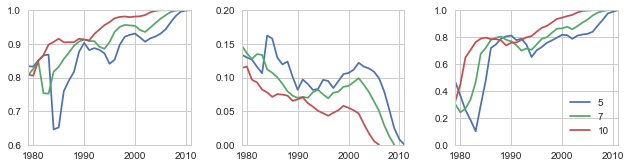

In [56]:
%%time
# df_start_year, df_end_year = df_all_years.index.year[0], df_all_years.index.year[-1]
start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
x = arange(0, df.speed.max() + 1)
fig = plt.figure(figsize=(9,2.5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
gofs_mean_set = []

for year_length in [5, 7, 10]:
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    density, _ = np.histogram(df_standard['speed'], bins=x, density=True)
    density_dir, _ = dir_hist(df_standard['dir'], bins=arange(-5,370,10), density=True)
    y_ecdf = sm.distributions.ECDF(df_standard.speed)(x)

    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, 2016-year_length+1)]

    gofs = pd.DataFrame(gofs)
    gofs.set_index(['year'], inplace=True)    
    if len(gofs)>0:
        ax1.plot(gofs.r_square, label=year_length)
        ax2.plot(gofs.k_s, label=year_length)
        ax3.plot(gofs.r_square_dir, label=year_length)
    year_lim = end_year-year_length-10, end_year-year_length
    gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set.append(gofs_mean)
plt.tight_layout()
plt.legend()
for ax in [ax1, ax2, ax3]:
    plt_configure(ax=ax, tight='xtight')
    
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

# 5. GMM by Expectation-maximization

In [57]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [58]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.422   2.815  -2.608  1.909  2.243   0.061
2  0.300   1.619   3.809  2.333  2.343  -0.231
3  0.278  -2.406   1.604  2.164  3.025  -0.116

GMM Plot Result
0.422445912702 [[ 2.8149573  -2.60812399]] [ 1.89628454  2.25357724] 169.648023101
0.299716933321 [[ 1.61903769  3.80946694]] [ 2.05076447  2.59340235] -135.527788182
0.277837153977 [[-2.40585979  1.60395871]] [ 2.13530816  3.0456174 ] -170.645911326


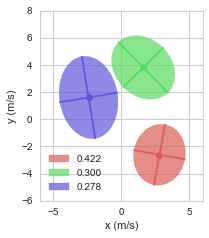

In [59]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLFd9LvhlbV1LV3X1vu9XgMAIkAQyIMnj+5CFCWOw
8AMrPBOjZ4zHDCOQkZEEkkCBuJYQcB1+yCPDBcGLK/EkLExgGQXYrJrRe2a7I8KIK1u3l+qu7q59
X7NymT9KJ29WVmbWyays7qpWfhEK9e0+depUVeZXv/X7MaIoirBhw4aNYwrHUR/Ahg0bNnoJm+Rs
2LBxrGGTnA0bNo41bJKzYcPGsYZNcjZs2DjWsEnOhg0bxxo2ydmwYeNYwyY5GzZsHGvYJGfDho1j
DZvkbNiwcaxhk5wNGzaONWySs2HDxrGGTXI2bNg41rBJzoYNG8caNsnZsGHjWMMmORs2bBxr2CRn
w4aNYw2b5GzYsHGsYZOcDRs2jjVskrNhw8axhk1yNmzYONawSc6GDRvHGjbJ2bBh41jDJjkbNmwc
a9gkZ8OGjWMN11EfwMbRQxRFsCwLjuPgdDrhdrvhcDjAMMxRH82Gja7BiKIoHvUhbBwd6vU68vk8
gsEgGo0GAGB/fx+jo6MIBoNwOBw26dkYaNiW3EsYPM+jWq0imUwiEAiA4zi43W6IoghRFMHzPDiO
A8uyYBgGTqfTJj0bAweb5F6CEEURHMeB53kwDAOe57GxsQGe5+FyuSAIAiqVCoaGhuByXbxECOnV
63U4HA44nU44nU64XC6b9Gz0LWx39SUGQRDQaDRAPvaDgwNkMhksLS3B4/GAZVnEYjEwDINGowGX
ywW/3w+fzwe/3w+n09myH9mHYRiJ7FwuV9s6GzaOCrYl9xIBcT95ngcAcByHaDQKQRDgdrsRDAbB
siy8Xi/cbjdGRkYQCARQr9dRqVSQz+cRj8cl0iPEJyczjuMgiiLq9ToSiQSmp6fh8Xhs0rNxpLBJ
7iUAQRDAcRwEQQDDMCgWi9jb28PY2BhCoRB2dnZa1jMMA1EUwTAMvF4vvF4vxsbGIIoiarUaqtUq
crkcYrEY3G63RHhy0iuXy2BZViI94t7alp6Nw4ZNcsccJI5GkgmxWAyFQgGLi4uSpUYbsWAYRiIz
OelVKhXkcjkcHBzA4/HA7/dDFEWJVIGLcUCb9GwcNmySO6YQBAE8z0MQBAAAy7LY3d2Fx+PB+vq6
lFDoJlkgJz3ynMTSEwQBu7u7GBoakuJ5Pp8PDkez/twmPRuHBZvkjiEEQUAqlUI+n8fS0hKy2Sxi
sRimpqYwNjbWRmxKS464q0bhcDikeF2hUMDs7KyUqc1kMqjVahgaGmpxb/VIr1QqIRQKYWhoyCY9
G6Zhk9wxA3FPgSZxRKNRVKtVrK6uwuv1tq3vZdmHw+GA1+uF3+8H0CTfarWKarWKdDqNer0Or9cr
WXper7eF9BKJBFwuFziOsy09G6Zhk9wxgbL2rdFooFQqIRwOY319XSIPrccCvSU8oEl6gUAAgUAA
wEXSq1QqSKVSEukRS48kP4hlqeXeejweu0bPhiZskjsGUNa+pVIpJBIJeDwezM/P6z5WjRzMuqtG
oSQ90oFBujA4jkMsFkMgEJAsvU6JDNJ7a5OeDQKb5AYcxHoDmiSxt7cHjuMwMzODQqFAtUe/1IM7
nU4MDw9jeHgYALC5uYlQKASWZZFIJNBoNFosPTXSazQaqNVqEukxDAO32227ty9h2CQ3oFC6p6VS
CdFoFOFwGEtLSyiXy1TkpWXxWEF83e7BMAz8fj/C4TCAi5ZepVJBPB4Hx3ES6fn9fgwNDbWR3sHB
gbSHbem9NGGT3ABCXvsGAPF4HNlsFvPz8wgGg9I6syRjBQH0gkSUlh7HcRLpxWIxcBzXUq4yNDQk
nUXL0rNJ7/jDJrkBgiiKSKfTcLvd8Hq9aDQaiEajYBgG6+vrcLvd0lram/aw4m+9gMvlQjAYlIhd
Tnq5XA48z0sJl6GhoZYEhZz0SEyPEJ9NescLNskNCEhrVjableJUe3t7mJiYwMTERNtN2S15DSLx
qZHe/v6+9H+e51vEBuSkJwiClMCRk57L5YLL5bJJb4Bhk9wAgOd5SdASALLZLFiWxfLyslSDZhby
PlX5744DCEER4ms0Gi2WniAIEuH5/f4WC05Oeo1GA8ViEdPT0zbpDSBskutjKJMLtVoNpVIJQ0ND
OHHihG7GcJDd0F7B7XbD7XYjFAoBABqNBiqVCqrVKjKZDERRbLH0COlxHIdKpSK5twzD2JbeAMEm
uT6FXDkEADKZDOLxOLxeL0ZGRjqWRNCSHLk5C4UC8vm8VIT7UiBIIik1MjICURRbLL1MJgMA8Pl8
kpCo3OKVW3o26fU3bJLrQ8hr3wRBwP7+Pmq1GlZXV6WbzyoQEj04OMDIyAhKpRLK5TIcDgcajYbk
yh1FnZlVZSw0hMMwDDweDzweTwvpVSoVFItF1Ot1bG1tqVp6gE16/Qyb5PoISve0Uqlgd3cXwWBQ
as0yYqF1WkeUSQBgbW1NWp9IJAA0LZ1CoYB4PA63291SnkFDelaQ1FGRg5z03G43MpkMpqenUalU
UC6XkUql4HA4Wt4TLdIDmuUvpJhZXs9no/ewSa5PoKx9SyaTSKVSmJubw8jIiKk99UimUChgb28P
k5OTqFarcDqdUmM/IdPR0VGMjo626MZls1kcHBxIaiLKxnqC43QTi6Io9ch6PB6Ew2FpjGOlUkGp
VEIikYDT6WxJZMgtOEEQkEgkEAgEEAwGW4YCkc4MG72BTXJHDFEUUS6XcXBwgKWlJfA8L8mSr6+v
w+PxtKw3GmtTQhAExONxFAoFKTubSCR095Trxo2Pj0u6cWqN9YT0+gW07qpRMAyDoaEhDA0NSV8E
hPSKxaJEenKpeLnggJqlR4YC2aRnLWySO0KQ5AKZgEVkyUdHRzE1NdVV87zaOuKeulyujtlZPch1
48jrIFlK0mMKQOqdHXT3jIYo1UivXq+jWq1KLj9RSwYuJjSU7i3LsgDQNhRokN+/o4ZNckcEuXtK
pJH29vawsLAgtS2pwUhpiHxdPp/H/v4+JicnMT4+3lYXR84h/z8tHA5HS7sVz/OIRCKSigjHcZpF
uIMAM7FF+XwMQno7OztwuVxtQ4Hkk9DI+0KGDiln3tqkZxw2yR0y1HTfotEoRFHEiRMnWuac6u3R
CXILIRaLoVgsWlI8TAPieo2NjcHr9Up1ZiSmR+rR5EW4vYJV7mq3e5CMaygUkmZgEKn4fD6PWCwG
j8fTltxRI72DgwPMzs62TEKzSU8bNskdIpRTs4h1NTY2Js047QQjPamCIGBzcxMej6eje9rLujiX
y4VQKNRWhEtiekRtRB6w7yf0Iq5nZCiQfBIawzCoVqtSF4xt6XVGf11Nxxjy2jdRFLG/v49yuYyV
lRWpRIEGtK5koVCAKIoYHR1Vneug3FP5bxI76gZa51QW4SqzlC6XCz6fTxrG00tL7zChR5Z6Q4Hk
GW3yvijVnG33Vhs2yfUYaq1Zu7u78Pl8WF9fh9PpBM/zhsYC6q2Vu6cAMD4+Tn3Oo7gRtAL2lUoF
oihKE8bkWUo9KXclDrOg2Mp95MkdZUZbFEVsb2+rDgWSkx7HcTbpwSa5nkLZWJ9Op5FIJDAzM4PR
0VHp90YC/Xpr6/V6y9jB559/nnpPq2F2T3nAPpvNYnFxETzPq0780qrRs+osVqMbspSTXiaTwdra
mvRl0GkoEKBOevV6HcPDw8e+I8MmuR5AFEXwPI/nnnsOJ06cAADs7++DZVmsra1JYo4ERrOZamtJ
fI+MHTRzZnKh91Nzv1qNHpkDQWr0yN+VcyCswlFZuWogn4taGY/aUCA90tve3sby8rJUkEyKk+UW
4XGATXIWQ9l

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1wFEX6x7+b3SyJZCG8hBAgBAiggEHkRc/y7eQuelLo
mcMciTF3Kj9UrvB84SjQEvAOJJyo94cgKlceEqSM4B/KlYUvgKLciRAuEFiDEEgIIW7CS3A3EBI2
+/tj6UnvbM9Mz+zsZpb0p2qrws5Md2/Yb56nn376aVsgEAhAIBBYjoSuHoBAIGAjxCkQWBQhToHA
oghxCgQWRYhTILAoQpwCgUVxdPUAtCgvL+/qIQgszqRJk1SvV1Rsg9+fyrzmdDqRk5MTjWFFjOXF
CQBlf90R1fa9Xi9cLldU+yBUe1qkn7NzMnU/7/X64HKlmDOWyrrOsaT3NKVNQqx+pzOX3KV5j9+f
isyhy5nX6k68YPaQTCMuxBnv0IIEjIkyGpBxVFfWodrTYrpABZEhxBklrCpIFtk5mZJAAfOtqMAY
QpwmEk1Bus+eBwD4/X7Y289L74/t29uU9oUVtR5CnAaRC5EQDUECQPZ1GQDC53Luqoaw5yIRLG1F
hUC7FiFODlhCjJabyhKkGqx7iGCNipS2ooBwc7sKIU4VIo2s6kGvKNXIvi4D1VUNUpuRiFRY0a5D
iFMBKTgSI1FGKkg5pL1IRSqCRV2HyBBiEAthus+ej5owabKvy5Dap/vU1UZOZqerqzDXvlrp6OjA
4sWLMXPmTBQXF6O2tjbk+vbt2zFjxgzMnDkTH374Yci1/fv3o7i4WPq32+3G7bffjuLiYhQXF+PT
Tz9V7VtYThnRFqZR97Wy+QwA4LLfD0dzG3JS++nq1wxL2h3nol9++SXa2tpQVlaGiooKrFixAmvW
rAEAtLe3o6SkBJs3b0ZycjIKCwsxdepU9O/fH2vXrsUnn3yC5ORkqa1Dhw7h0UcfxWOPPcbVt7Cc
FNEUptxS8gizsvmM9Bo5YgBGjhiAwQNTwq4R4fIgt6RG6E5WtLy8HLfffjsAYMKECTh48KB0rbq6
GkOHDkXv3r3hdDoxadIk7NmzBwAwdOhQvPHGGyFtHTx4EF999RWKiorwwgsvwOfzqfYtLCeABm8A
jRdaTBel/MvPK0iakSMGhN0jf+/oscaQ53isaqRBo3gLFp1r+9HQcz6fDykpnemSdrsdly9fhsPh
gM/nC1nW6tmzpyS4e+65BydPngxpa/z48cjPz8f111+PNWvWYPXq1ViwYIFi391enGZbSyOCBEJF
yRKkGvT9tFC1RCp3da9mgdbhNub7fTSeS0lJQUtLp4fQ0dEBh8PBvNbS0qKaT5ybm4tevXpJPy9d
ulS1b+HWAsjI7h/R88RllbutelxXAJLrGgl0G7zuLhmrkYDR1e7iTpw4ETt37gQAVFRUYPTo0dK1
7Oxs1NbWorm5GW1tbdi7dy9uvPFGxbZmzZqFAwcOAAD++9//Yty4cap9d2vLWe0JurJer7rvz8Ko
haShRal5r7cJAHDZfxkObytyXGmq90sCPdYIILqubjxZUL3k5uZi165dKCgoQCAQwPLly7FlyxZc
uHABM2fOxMKFCzFr1iwEAgHMmDED6enpim299NJLWLp0KRITE9G/f39Ny2mzemnM8vLyqGwZo91Z
PduwzEgW4HVhiSAB4NrMoBi9Xi9ONbeG3Kcl1KNXBArwiRQIurqA/rkoieQOuKYjZlvGtPZzlpeX
49zAfzKv9fnp/zSf7yq6teXknWeamb3DYy1ZoqSh3ztc1yTdryRS0heZj8bCigoip1uKU8/8yKxE
AR5rqSVKFuQ+XpHGImCUnZOJHytqEKP961ct3VKcAJ/VjESYrGCMlii1BLm/1QN/gh8TEf6tl4uU
14oC/CLVm1B/Nc5BY0m3E6feqKKRpRCCnkCPkjD3t3qkn8dkDMDBkw3Y3+rBDUnswANpp7JOn6sL
8ImU19XNyO6Pxppzqu0J1Ol24gT4rabepAE9yyBaLqxclISs3ik46bsoXVcTqZYVlY+ZJ7Krx9Ul
809hPY3RJeLMy8uTsi6GDBmCkpKSrhiGIjxrfZEkDahZSyVR0pD3f2hoVBUpLVBAO6qrZ/mFWFEe
hHtrjJiL89KlSwgEAigtLY1119K6phpa88xIRAkoC5NHlO72elxOvIzxV+accpEqCRTQnovS0IEj
LYG6qxq4rKdAPzEXZ1VVFS5evIjHHnsMly9fxnPPPYcJEybEehhM1IQZLVECncJUEyUAjE1Lw4Gf
GuBur8fYxMHS9TEZA7rMivIIFOh663nyQi3zfa30va4k5uJMSkrCrFmzkJ+fj5qaGsyePRtbt26V
8hVZeL1eU/r2+wOK2UBerw9+vx8ZQ3uH9Xe07SIASDtCeMZz1B/ez9B+KSHPHkno/Dmrd0pYu8cT
zwIAhvfs7Hd4zxQcb/HhgL8Ww9v7SvcOSQluTao978O+llMY1REe0R2UmgQAOHHGh/81B13SkXb1
5Iv0tGTU/+TD/84ERTrSmRx2z4DBKag8cRbDkpwh75Pf9YBhfdBQfdq0/0cjnAvc2mV9GyXm4hw+
fDiysrJgs9kwfPhwpKamoqmpCRkZysEXMzJNqj0tGD2B7dKSDCF7+3lmX47mNk1rSQd4AGDcMPVg
0v5WD+ywM60lsZQOODA2LdTCeb1ejB94ZWmjqSnEggLA9S4XfmhoxDH7BcVg0bgrn/FwXRNqEMw2
UrOk1125/+ixRtT42XtJG+0+1LX7JQsqz7pyTUgRwSGdxDzxffPmzVixYgUAwOPxwOfzIS2Nb8Hd
qlR6m3BtZlrISw0lN9bdXh/iwsqFKWdsWpp0Pw1pl57HsqDHW+ltkl5KqCXUR7OaQ3cl5uJ88MEH
4fV6UVhYiGeffRbLly9XdWmtjtqXWc7+Vo+qMAFlUXoC1fAEquFNCo+QRiJQAv1HxahAAe1I99W6
eyUaxFwVTqcTr732Wqy7NQypQsC8xpnZA6gHfWhhyvEEqoPX+gRd1MqmU/AEqpFuy5aecTc1hQWJ
SF9qkVwWPEkMStFcreUVEbnVh9jPGSFqwiSWcn+rB2MyBii6sSxrSSwl0ClMABiW1Eu6TiDPKlnQ
MRkDuC2o/HMpWVG1ObjR8ieCUIQ4r8CbEUQg80wWcvc1EmtJC5NA3uMVKBkHPS4eeNxcuXur9TvM
zskUri0nQpwGYH1ZWVZSSZRKwlSylgDgRyX8qESPa46GXNcrUHqsPMgDRjRK88/s6zJQ09rG1b5A
GSFOnbDmmVpWkqAW9FGzln5UAgBGuQaF/NuoQGlXl36poWRFjbq3wnpq0y3EyZO2x4vSeqCaKGl4
gj40cmEOsYee0Mx0ezUESqCFKhcrCzU3V249M4aqp/TFC2YWlf7hhx/w0EMPobi4GLNmzcLp06dV
++4W4uRhbN/e3Inccm5ISscPDY3aN6r1zxAZgQhTV3sG1o5py68lUJpIi5JZGbqo9Lx586Q1eqCz
qPS7776L0tJSlJWVSYJbu3YtXnzxRVy6dEm6/+WXX8aiRYtQWlqK3NxcrF27VrVvIU4O6Bo83QFe
LyCeOOI9xXxpYWZR6ddffx1jxowBEDxntUePHqp9C3FqwEpVy3EFk8jlqFlPJReTni/K8aPSkNU0
CzXryZN8QcptWgE7cpgvLZSKSpNrakWl5ck1AwYE/+jt27cPGzZswCOPPKLatxCnSfAs8iu5mmou
bSQopffxoDfDaOSIAbqOhQDiIyhkZlFpAPj000+xZMkSvPPOO+jbt6/qvUKcnLBcW73WUw9dbTWB
6Lq38RIUMrOo9Mcff4wNGzagtLQUmZnanz9+k1pjSE5qvzCrkOMKd+1uSErXtciv5tJahTEZA7C/
ITz979rMNFT

## Goodness-of-fit Statistics

In [61]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.953  0.022      0.030  6.435457e-07      0.049       0.236

In [62]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [63]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [64]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.092522669015851
     jac: array([  2.42688882e+00,   0.00000000e+00,   4.76837158e-07,
         1.19209290e-07,   2.38418579e-07,   1.54972076e-06,
         2.42689013e+00,  -2.38418579e-07,  -4.76837158e-07,
         3.57627869e-07,   8.34465027e-07,   7.15255737e-07,
         2.42688918e+00,   3.57627869e-07,   2.38418579e-07,
         0.00000000e+00,  -2.38418579e-07,  -1.19209290e-06,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1024
     nit: 50
    njev: 50
  status: 0
 success: True
       x: array([ 0.24638145, -0.19075475, -1.93938744,  3.07769465,  2.03955689,
       -0.50554372,  0.41843352, -0.13869401,  3.76442404,  2.89134036,
        2.03992264, -0.01519273,  0.33518503,  3.38835855, -1.97136401,
        1.62905037,  2.79440263,  0.24004074])

## 6.1 GMM Result

In [65]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.418  -0.139   3.764  2.891  2.040  -0.015
2  0.335   3.388  -1.971  1.629  2.794   0.240
3  0.246  -0.191  -1.939  3.078  2.040  -0.506

GMM Plot Result
0.418433521882 [[-0.13869401  3.76442404]] [ 2.03945403  2.89167092] -91.2221009573
0.335185028518 [[ 3.38835855 -1.97136401]] [ 1.55940359  2.83385808] 168.512619379
0.2463814496 [[-0.19075475 -1.93938744]] [ 1.63636183  3.30973059] -115.034807161


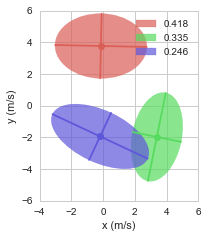

In [66]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [67]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.041  2.788693e-07      0.032       0.155

In [68]:
pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')

Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                
(1996, 2006)    0.172282  0.093756  0.000003    0.112913     0.540689   
(1986, 1996)    0.071516  0.055744  0.000002    0.081677     0.442926   

              R_square  
year_lim                
(1996, 2006)  0.749755  
(1986, 1996)  0.850390

In [69]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUK3d5LbhLr1ZLLbVa/X6oH+pjEyA28TFvDJk5yQnE
gcDgjB2TsMYzzosbcMAesI1t7AGf2Dxs5t6YOYAJsJYNsR1nMeCBm1zABq+QMeCcawaMTTitbnWr
W2+p9ZZK9Zg/dH7VpVJVqapU6pbatdfy8ulW6adqqWrr+33f/vZH8TzPw4IFCxaOKWxHfQIWLFiw
0E9YJGfBgoVjDYvkLFiwcKxhkZwFCxaONSySs2DBwrGGRXIWLFg41rBIzoIFC8caFslZsGDhWMMi
OQsWLBxrWCRnwYKFYw2L5CxYsHCsYZGcBQsWjjUskrNgwcKxhkVyFixYONawSM6CBQvHGhbJWbBg
4VjDIjkLFiwca1gkZ8GChWMNi+QsWLBwrGGRnAULFo41LJKzYMHCsYZFchYsWDjWsEjOggULxxoW
yVmwYOFYwyI5CxYsHGs4jvoELBw9eJ4HTdNgGAZ2ux1OpxM2mw0URR31qVmw0DMonuf5oz4JC0eH
RqOBQqEAn8+HZrMJANjb28PExAR8Ph9sNptFehaGGlYk9xIGy7Ko1WpIp9Pwer1gGAZOpxM8z4Pn
ebAsC4ZhQNM0KIqC3W63SM/C0MEiuZcgeJ4HwzBgWRYURYFlWWxsbIBlWTgcDnAch2q1ipGRETgc
B5cIIb1GowGbzQa73Q673Q6Hw2GRnoWBhbVdfYmB4zg0m02Qjz0ejyOXy2F5eRkulws0TSORSICi
KDSbTTgcDng8HoyOjsLj8cBut7etR9ahKEogO4fD0XGcBQtHBSuSe4mAbD9ZlgUAMAyDWCwGjuPg
dDrh8/lA0zTcbjecTifGx8fh9XrRaDRQrVZRKBSQTCYF0iPEJyYzhmHA8zwajQZSqRRmZ2fhcrks
0rNwpLBI7iUAjuPAMAw4jgNFUSiVStjd3UUwGITf78f29nbb8RRFged5UBQFt9sNt9uNYDAInudR
r9dRq9Wwv7+PRCIBp9MpEJ6Y9CqVCmiaFkiPbG+tSM/CYcMiuWMOkkcjxYREIoFisYhQKCREaloz
FhRFCWQmJr1qtYr9/X3E43G4XC54PB7wPC+QKnCQB7RIz8JhwyK5YwqO48CyLDiOAwDQNI2dnR24
XC6sr68LBYVeigVi0iOvSSI9juOws7ODkZERIZ83OjoKm62lP7dIz8JhwSK5YwiO45DJZFAoFLC8
vIx8Po9EIoGZmRkEg8EOYpNGcmS7qhc2m03I1xWLRczPzwuV2lwuh3q9jpGRkbbtrRrplctl+P1+
jIyMWKRnwTAskjtmINtToEUcsVgMtVoNa2trcLvdHcf3U/Zhs9ngdrvh8XgAtMi3VquhVqshm82i
0WjA7XYLkZ7b7W4jvVQqBYfDAYZhrEjPgmFYJHdMINW+NZtNlMtlBAIBrK+vC+Sh9Fygv4QHtEjP
6/XC6/UCOCC9arWKTCYjkB6J9Ejxg0SWSttbl8tlafQsKMIiuWMAqfYtk8kglUrB5XJhcXFR9bly
5GB0u6oXUtIjHRikC4NhGCQSCXi9XiHS61bIIL23FulZILBIbshBojegRRK7u7tgGAZzc3MoFoua
1hgUPbjdbsfY2BjGxsYAAJFIBH6/HzRNI5VKodlstkV6cqTXbDZRr9cF0qMoCk6n09revoRhkdyQ
Qro9LZfLiMViCAQCWF5eRqVS0UReShGPGcTX6xoURcHj8SAQCAA4iPSq1SqSySQYhhFIz+PxYGRk
pIP04vG4sIYV6b00YZHcEEKsfQOAZDKJfD6PxcVF+Hw+4TijJGMGAfSDRKSRHsMwAuklEgkwDNMm
VxkZGRHORSnSs0jv+MMiuSECz/PIZrNwOp1wu91oNpuIxWKgKArr6+twOp3CsVpv2sPKv/UDDocD
Pp9PIHYx6e3v74NlWaHgMjIy0lagEJMeyekR4rNI73jBIrkhAWnNyufzQp5qd3cXU1NTmJqa6rgp
eyWvYSQ+OdLb29sT/s+ybJvZgJj0OI4TCjhi0nM4HHA4HBbpDTEskhsCsCwrGFoCQD6fB03TWFlZ
ETRoRiHuUxX/7jiAEBQhvmaz2RbpcRwnEJ7H42mL4MSk12w2USqVMDs7a5HeEMIiuQGGtLhQr9dR
LpcxMjKCEydOqFYMh3kb2i84nU44nU74/X4AQLPZRLVaRa1WQy6XA8/zbZEeIT2GYVCtVoXtLUVR
VqQ3RLBIbkAhdg4BgFwuh2QyCbfbjfHx8a6SCK0kR27OYrGIQqEgiHBfCgRJLKXGx8fB83xbpJfL
5QAAo6OjgpGoOOIVR3oW6Q02LJIbQIi1bxzHYW9vD/V6HWtra8LNZxYIicbjcYyPj6NcLqNSqcBm
s6HZbApbuaPQmZklY9FCOBRFweVyweVytZFetVpFqVRCo9HA5uambKQHWKQ3yLBIboAg3Z5Wq1Xs
7OzA5/MJrVl6IrRuxxFnEgAIh8PC8alUCkAr0ikWi0gmk3A6nW3yDC2kZwZJHRU5iEnP6XQil8th
dnYW1WoVlUoFmUwGNput7T1RIj2gJX8hYmaxns9C/2GR3IBAqn1Lp9PIZDJYWFjA+Pi4oTXVSKZY
LGJ3dxfT09Oo1Wqw2+1CYz8h04mJCUxMTLT5xuXzecTjccFNRNpYT3CcbmKe54UeWZfLhUAgIIxx
rFarKJfLSKVSsNvtbYUMcQTHcRxSqRS8Xi98Pl/bUCDSmWGhP7BI7ojB8zwqlQri8TiWl5fBsqxg
S76+vg6Xy9V2vN5cmxQcxyGZTKJYLArV2VQqpbqm2DducnJS8I2Ta6wnpDco0Lpd1QuKojAyMoKR
kRHhi4CQXqlUEkhPbBUvNhyQi/TIUCCL9MyFRXJHCFJcIBOwiC35xMQEZmZmemqelzuObE8dDkfX
6qwaxL5x5O8gVUrSYwpA6J0d9u2ZFqKUI71Go4FarSZs+YlbMnBQ0JBub2maBoCOoUDD/P4dNSyS
OyKIt6fEGml3dxdLS0tC25Ic9EhDxMcVCgXs7e1henoak5OTHbo4ch7i/2uFzWZra7diWRbRaFRw
EWEYRlGEOwwwklsUz8cgpLe9vQ2Hw9ExFEg8CY28L2TokHTmrUV6+mGR3CFDzvctFouB53mcOHGi
bc6p2hrdII4QEokESqWSKeJhLSBbr2AwCLfbLejMSE6P6NHEItx+waztaq9rkIqr3+8XZmAQq/hC
oYBEIgGXy9VR3JEjvXg8jvn5+bZJaBbpKcMiuUOEdGoWia6CwaAw47Qb9PSkchyHSCQCl8vVdXva
T12cw+GA3+/vEOGSnB5xGxEn7AcJ/cjr6RkKJJ6ERlEUarWa0AVjRXrdMVhX0zGGWPvG8zz29vZQ
qVSwuroqSBS0QOtWslgsgud5TExMyM51kK4p/ZnkjnqB0nlKRbjSKqXD4cDo6KgwjKefkd5hQo0s
1YYCiSva5H2Rujlb21tlWCTXZ8i1Zu3s7GB0dBTr6+uw2+1gWVbXWEC1Y8XbUwCYnJzUfJ5HcSMo
Jeyr1Sp4nhcmjImrlGpW7lIcpqDYzHXExR1pRZvneWxtbckOBRKTHsMwFunBIrm+QtpYn81mkUql
MDc3h4mJCeH3ehL9asc2Go22sYMvvvii5jXNhtE1xQn7fD6PUCgElmVlJ34pafTMOhez0QtZikkv
l8shHA4LXwbdhgIB8qTXaDQwNjZ27DsyLJLrA3ieB8uyeP7553HixAkAwN7eHmiaRjgcFswcCfRW
M+WOJfk9MnbQyDmTC32QmvvlNHpkDgTR6JHHpXMgzMJRRblyIJ+LnIxHbiiQGultbW1hZWVFECQT
cbI4IjwOsEj

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1wFEX6x7+b3SyJZCG8hBAgBAiggEHkRc/y7eQuelLo
mcMciTF3Kj9UrvB84SjQEvAOJJyo94cgKlceEqSM4B/KlYUvgKLciRAuEFiDEEgIIW7CS3A3EBI2
+/tj6UnvbM9Mz+zsZpb0p2qrws5Md2/Yb56nn376aVsgEAhAIBBYjoSuHoBAIGAjxCkQWBQhToHA
oghxCgQWRYhTILAoQpwCgUVxdPUAtCgvL+/qIQgszqRJk1SvV1Rsg9+fyrzmdDqRk5MTjWFFjOXF
CQBlf90R1fa9Xi9cLldU+yBUe1qkn7NzMnU/7/X64HKlmDOWyrrOsaT3NKVNQqx+pzOX3KV5j9+f
isyhy5nX6k68YPaQTCMuxBnv0IIEjIkyGpBxVFfWodrTYrpABZEhxBklrCpIFtk5mZJAAfOtqMAY
QpwmEk1Bus+eBwD4/X7Y289L74/t29uU9oUVtR5CnAaRC5EQDUECQPZ1GQDC53Luqoaw5yIRLG1F
hUC7FiFODlhCjJabyhKkGqx7iGCNipS2ooBwc7sKIU4VIo2s6kGvKNXIvi4D1VUNUpuRiFRY0a5D
iFMBKTgSI1FGKkg5pL1IRSqCRV2HyBBiEAthus+ej5owabKvy5Dap/vU1UZOZqerqzDXvlrp6OjA
4sWLMXPmTBQXF6O2tjbk+vbt2zFjxgzMnDkTH374Yci1/fv3o7i4WPq32+3G7bffjuLiYhQXF+PT
Tz9V7VtYThnRFqZR97Wy+QwA4LLfD0dzG3JS++nq1wxL2h3nol9++SXa2tpQVlaGiooKrFixAmvW
rAEAtLe3o6SkBJs3b0ZycjIKCwsxdepU9O/fH2vXrsUnn3yC5ORkqa1Dhw7h0UcfxWOPPcbVt7Cc
FNEUptxS8gizsvmM9Bo5YgBGjhiAwQNTwq4R4fIgt6RG6E5WtLy8HLfffjsAYMKECTh48KB0rbq6
GkOHDkXv3r3hdDoxadIk7NmzBwAwdOhQvPHGGyFtHTx4EF999RWKiorwwgsvwOfzqfYtLCeABm8A
jRdaTBel/MvPK0iakSMGhN0jf+/oscaQ53isaqRBo3gLFp1r+9HQcz6fDykpnemSdrsdly9fhsPh
gM/nC1nW6tmzpyS4e+65BydPngxpa/z48cjPz8f111+PNWvWYPXq1ViwYIFi391enGZbSyOCBEJF
yRKkGvT9tFC1RCp3da9mgdbhNub7fTSeS0lJQUtLp4fQ0dEBh8PBvNbS0qKaT5ybm4tevXpJPy9d
ulS1b+HWAsjI7h/R88RllbutelxXAJLrGgl0G7zuLhmrkYDR1e7iTpw4ETt37gQAVFRUYPTo0dK1
7Oxs1NbWorm5GW1tbdi7dy9uvPFGxbZmzZqFAwcOAAD++9//Yty4cap9d2vLWe0JurJer7rvz8Ko
haShRal5r7cJAHDZfxkObytyXGmq90sCPdYIILqubjxZUL3k5uZi165dKCgoQCAQwPLly7FlyxZc
uHABM2fOxMKFCzFr1iwEAgHMmDED6enpim299NJLWLp0KRITE9G/f39Ny2mzemnM8vLyqGwZo91Z
PduwzEgW4HVhiSAB4NrMoBi9Xi9ONbeG3Kcl1KNXBArwiRQIurqA/rkoieQOuKYjZlvGtPZzlpeX
49zAfzKv9fnp/zSf7yq6teXknWeamb3DYy1ZoqSh3ztc1yTdryRS0heZj8bCigoip1uKU8/8yKxE
AR5rqSVKFuQ+XpHGImCUnZOJHytqEKP961ct3VKcAJ/VjESYrGCMlii1BLm/1QN/gh8TEf6tl4uU
14oC/CLVm1B/Nc5BY0m3E6feqKKRpRCCnkCPkjD3t3qkn8dkDMDBkw3Y3+rBDUnswANpp7JOn6sL
8ImU19XNyO6Pxppzqu0J1Ol24gT4rabepAE9yyBaLqxclISs3ik46bsoXVcTqZYVlY+ZJ7Krx9Ul
809hPY3RJeLMy8uTsi6GDBmCkpKSrhiGIjxrfZEkDahZSyVR0pD3f2hoVBUpLVBAO6qrZ/mFWFEe
hHtrjJiL89KlSwgEAigtLY1119K6phpa88xIRAkoC5NHlO72elxOvIzxV+accpEqCRTQnovS0IEj
LYG6qxq4rKdAPzEXZ1VVFS5evIjHHnsMly9fxnPPPYcJEybEehhM1IQZLVECncJUEyUAjE1Lw4Gf
GuBur8fYxMHS9TEZA7rMivIIFOh663nyQi3zfa30va4k5uJMSkrCrFmzkJ+fj5qaGsyePRtbt26V
8hVZeL1eU/r2+wOK2UBerw9+vx8ZQ3uH9Xe07SIASDtCeMZz1B/ez9B+KSHPHkno/Dmrd0pYu8cT
zwIAhvfs7Hd4zxQcb/HhgL8Ww9v7SvcOSQluTao978O+llMY1REe0R2UmgQAOHHGh/81B13SkXb1
5Iv0tGTU/+TD/84ERTrSmRx2z4DBKag8cRbDkpwh75Pf9YBhfdBQfdq0/0cjnAvc2mV9GyXm4hw+
fDiysrJgs9kwfPhwpKamoqmpCRkZysEXMzJNqj0tGD2B7dKSDCF7+3lmX47mNk1rSQd4AGDcMPVg
0v5WD+ywM60lsZQOODA2LdTCeb1ejB94ZWmjqSnEggLA9S4XfmhoxDH7BcVg0bgrn/FwXRNqEMw2
UrOk1125/+ixRtT42XtJG+0+1LX7JQsqz7pyTUgRwSGdxDzxffPmzVixYgUAwOPxwOfzIS2Nb8Hd
qlR6m3BtZlrISw0lN9bdXh/iwsqFKWdsWpp0Pw1pl57HsqDHW+ltkl5KqCXUR7OaQ3cl5uJ88MEH
4fV6UVhYiGeffRbLly9XdWmtjtqXWc7+Vo+qMAFlUXoC1fAEquFNCo+QRiJQAv1HxahAAe1I99W6
eyUaxFwVTqcTr732Wqy7NQypQsC8xpnZA6gHfWhhyvEEqoPX+gRd1MqmU/AEqpFuy5aecTc1hQWJ
SF9qkVwWPEkMStFcreUVEbnVh9jPGSFqwiSWcn+rB2MyBii6sSxrSSwl0ClMABiW1Eu6TiDPKlnQ
MRkDuC2o/HMpWVG1ObjR8ieCUIQ4r8CbEUQg80wWcvc1EmtJC5NA3uMVKBkHPS4eeNxcuXur9TvM
zskUri0nQpwGYH1ZWVZSSZRKwlSylgDgRyX8qESPa46GXNcrUHqsPMgDRjRK88/s6zJQ09rG1b5A
GSFOnbDmmVpWkqAW9FGzln5UAgBGuQaF/NuoQGlXl36poWRFjbq3wnpq0y3EyZO2x4vSeqCaKGl4
gj40cmEOsYee0Mx0ezUESqCFKhcrCzU3V249M4aqp/TFC2YWlf7hhx/w0EMPobi4GLNmzcLp06dV
++4W4uRhbN/e3Inccm5ISscPDY3aN6r1zxAZgQhTV3sG1o5py68lUJpIi5JZGbqo9Lx586Q1eqCz
qPS7776L0tJSlJWVSYJbu3YtXnzxRVy6dEm6/+WXX8aiRYtQWlqK3NxcrF27VrVvIU4O6Bo83QFe
LyCeOOI9xXxpYWZR6ddffx1jxowBEDxntUePHqp9C3FqwEpVy3EFk8jlqFlPJReTni/K8aPSkNU0
CzXryZN8QcptWgE7cpgvLZSKSpNrakWl5ck1AwYE/+jt27cPGzZswCOPPKLatxCnSfAs8iu5mmou
bSQopffxoDfDaOSIAbqOhQDiIyhkZlFpAPj000+xZMkSvPPOO+jbt6/qvUKcnLBcW73WUw9dbTWB
6Lq38RIUMrOo9Mcff4wNGzagtLQUmZnanz9+k1pjSE5qvzCrkOMKd+1uSErXtciv5tJahTEZA7C/
ITz979rMNFT

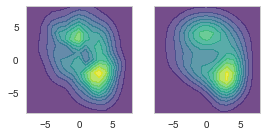

In [70]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

## 6.3 Univariate Goodness-of-fit

In [71]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [72]:
%%time
x = arange(0, max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

Wall time: 13 s


Speed Distribution Comparison
(0.9907283073905836, 0.98070206341876642, 0.98475537305422034)
Wall time: 8.88 s


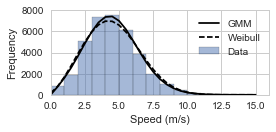

In [73]:
%%time
# Calculate Speed Distribution
# 1. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [74]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADSCAYAAACCXZ8eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYVNUfx/H3sIysIiKKFrhLriGY4oYpmnsupGCKmpZp
pbkm2k9zRY2s3DA1S8VMc01N1HDJxJVBRCRxDVdABYQZkG3u7w9iijBUnMuwnNfz9OTcM1w+3Bm+
nHvnnHMVkiRJCIIgFIGRoQMIglB6iQIiCEKRiQIiCEKRiQIiCEKRiQIiCEKRiQIiCEKRyVpAzp8/
j6+vb4Hthw8fxsvLC29vb3766Sc5IwiCICMTuXa8Zs0adu/ejbm5eb7tWVlZLFiwgG3btmFubs6g
QYPo1KkTVapUkSuKIAgyka0H4uTkxLJlywpsv3btGk5OTtjY2KBUKnFzc+Ps2bNyxRAEQUay9UC6
du3K7du3C2xXq9VYW1vrHltaWqJWq5+6P5VKpdd8giA8Ozc3tydul62A/BcrKys0Go3usUajyVdQ
CvNfP0RxU6lUIssT6CtLyImLfLVqK3euR/Lw3g2S7t9Ck/LwP59v/1J97KpUJSHuNkn3b2FuaUMF
84qYW9lgYVWJ1zx9UJpZoU6+j1aSsLC0QWluhVJpjtLMnJcdKnPvQcE/YjWqWCHBC7dp0tKwtLDQ
6z7/6ZE6Exsr5XPnmOLbosDXPElhf7yLvYDUrVuX2NhYkpOTsbCwICwsjJEjRxZ3DKEECI9JIOTM
Ta7/eRt1wiUyEy9zMeI00dHR+Z5nbVuNmq+0JCdDze0buW3mVpWo+lJ9bKs60rr7CMwtrLC1NOL+
o0yMjIz/45fWsUCGGlWs8GzpRNC+6AJtni2dAEp8W7c2tTgZebdI+3tRxVZA9uzZQ1paGt7e3vj5
+TFy5EgkScLLy4tq1aoVVwyhhDh06g/mLFxB9Nn9PLh7Tbe9gpkZtlUdyUjXkJaaCMAbPlNxrN+c
h3HXSX/4J1ZVnbGpUgOFQqH7OofKlkUuBK7OVXMznblJXKJGt6+87S/adu1Wmq5Q6Wuf/26r93Kl
Iud4EYrSMhu3LHbV9aGkZ8nrZcQ91FDV1hwbbSy/HdjOtu07yMnOwsjYhJfruvByPRfMLW04umMJ
OTnZGBmbUKdRa+o2bUetV1phbmVTaG/Bt0cjXJ2rEh6T8NcvSwJ1Havm+2XJa/uvX7LiPC6GUNQc
hX1dsZ/CCOVHeEwCQfuiUSff5+LZ/Vw8vY+UxDgAKlerxStunjxOU1PRthou7fuRk51FTHgIAwf0
R23RDAurSvn29yy9BVfnqrg6V33imz6vTdAfUUAE2fxy7BLH967h3G9bycnJwkRpRuOW3fHo0p+4
O9fZv20l6epkqtSoi0v7fhibmDLus2+Z4tui0N6CKAQlhygggt5JksQPP/zAoikT0Dx6gHWlqrzW
eTDOrp48uHudrd8v5MHda5gqzWjTYyTNPd7SfW3e9QpRJEoHUUAEvVKpVIwbN44TJ05gYlqBVm8M
o0UnH0yVZgCkq5N4eO86I0aMYODw8UT+mVHs1yQE/REFRHhh4TEJ7AqJYOv3XxITflD36drwMX4c
DE/iRPB3mFlY85rn29Rt2p6te4/h1aMdAF3bGzj8c/rnRWEHO0s6l/OiJwqI8ELCYxLwX7qJX9Z9
xuO0FOwcavF6v7FM/3gINWy0/G/KB5w/dxa76rXpPWAkXdxrl9pfuLyLwnnuPVDrHhf1Zzp9+jTj
x4+nXr16SJJEdnY2Q4cOpUePHk98/t27d7l06RKdOnUq0vfTN1FAhBfi//lSdq5bCIB793dp2ckH
I2Njvv8xmJ3ffsqdO3fw8fHh22+/xdLS0sBpX0zImZtP3H7ozM0XKoru7u589dVXQO7IbF9fX2rX
rk3Dhg0LPPfUqVNcv35dFBChdMvJyWHKlCls/+4rzCwq0mv4bGxrNMDI2JiUpHjWL3gPbU42ixYt
YsqUKfkGfZVWcQ81T96e+OTtRWFpaYm3tzf79u1j48aNxMXFkZCQQKdOnRg3bhyrV6/m8ePHNG/e
HGtra5YvX44kSWg0GhYvXkzt2rX1luVZiAIiPJN/nvtXspA4uGk+ob+FYF+9Fj3fmUelKi+hSUsD
oKJtNTr3Gcn4d/vQrVs3AyfXHwc7yyfORXGorN+elZ2dHQcPHqRbt24MGDCAjIwMPDw8mDBhAqNG
jeL69et4enryww8/EBAQQLVq1fjmm2/Yv38/Y8aM0WuWpxEFRHiqf577P0qMY8Oi6TyMu4F729dZ
+NVqdh2/Q5o6meCgubTpPoIatRrjP392qb3W8V86P2WovL7cvXuX5s2bc+HCBU6dOoWVlRWZmZkF
nletWjXmz5+PhYUF8fHxuLq66jXHsxAFRHiqvHP/uzei2PP9DNLVybi060efkZ/Q4bX6aDRqfAcO
JvH+XW461mbqBwPKXPEAnmnOzItSq9Vs3bqVt956i/T0dObMmUNsbCw//fQTkiRhZGSEVqsFYMaM
Gfz6669YWVkxdepUDDErRRQQ4aniHmq492c021dOQqvNpqPXeF5t24f7jzJ48OABk8a8TeL9u4wY
MYI1a9ZgZFR2l9qVY4DbqVOn8PX1xcjIiJycHMaOHUvt2rWZNGkSERERKJVKatasSUJCAg0aNGDl
ypU0btyYN998k8GDB2Nubk6VKlVISEjQa65nIQqI8FQm2YnsXjsdrTab3u/MpU7jNgBUMofu3btz
6dIlJk2ahI+PT5kuHnJo1aoVJ0+efGLb7t27C2yrVq0aBw4cAKBnz56yZnsW4tUWCvXgwQM2L59E
uuYRnbzG64oHQKfXnKhSpQrvvPMOAQEBZeKTFuH5iB6I8J/S09Pp06cPt2Jv8M6ocTRsN4i4RA32
NhVo16wabZvX5ueff8bIyEgUj3JKFBDhibRaLb6+vpw4cYJBgwbx7cqvMDIyQpIk3n33XbYtP8/+
/fvFavrlnDiFEZ7ok08+Yfv27XTo0IHvv/9ed21j6tSpfPfddwAolQXX4RTKF9EDEXTyBovt3xXE
kR1LqVWnPjt37qRChQoAfP755wQEBODs7ExwcDAVK1Y0cGLB0EQBEYC/B4tdizrO0Z3LsbC2peOg
2dxIyMLWFg4ePMjUqVNxdHTk119/xd7e3tCRhRJAnMIIQO5gsUcP77J/43yMTZX0eXcBNnbVOfTX
IDI7OzsaN27Mzp07cXQsuLq5UHS3bt1i3LhxDBw4kKFDhzJq1CiuXLnCsmXLaNiwIfHx8brnPnz4
kMaNG7Njxw5u376Ns7Mzq1evzre/0aNHP/GWsnIQPRABgHv3Uzn44yKyMh/TbfB0qjk6A39PFHNz
cyMyMrJMj/OYMmUKW7du1es+BwwYgI+Pz3+2p6enM2bMGObOnUvz5s0BiIyMZM6cObRs2ZJatWoR
HBzM8OHDAdi3bx/Vq1fXfb2TkxMHDhxg1KhRACQlJREbG1tsF7fL7rtBeC7Xz+3jzvVI6jZtj7Nr
Z932K2d+5oMPPiA9Pb1MFw9DOXLkCO7u7rriAdCsWTM2bNgAQI8ePdi/f3++53fs2FH32NbWFjs7
O65dy701RnBwcLFOYBQ9EIGrV69yYNsKzCwr0umt8boxHQm3rxC8dTmVbW2ZOXNmgRullzUBAQEE
BATofb+F3dnt9u3bODn9PRlvzJgxqNVqEhISaNGiBU2aNMHc3Jxbt26h1WpxcHDQXdTO07NnT375
5RfGjRvHoUOHmDhxImFhYXr/OZ5E/Ekp53Jychg+fDgZj9P5bN4X1K/thJGRAjsrI0J3LCI7K4v1
69fj4OBg6KhlkoODQ757SK9cuZKgoCBsbGzIyckB/i4Qe/bsoXfv3gX20blzZw4fPszt27ext7fH
zMys2PKLAlL

0.0183082373987 0.0734518614953
2.0 5.0
Wall time: 9.22 s


Direction Distribution Comparison


0.90597651178678851

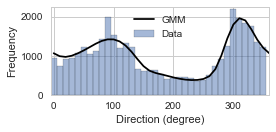

In [75]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 370, 10), density=True)

plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
sector_r_square(density*10, y[:-1])

In [76]:
pd.DataFrame(gofs_mean_set).set_index('year_lim')

k_s  r_square  r_square_dir
year_lim                                      
(1996, 2006)  0.105115  0.915024      0.797320
(1994, 2004)  0.083248  0.938867      0.829450
(1991, 2001)  0.053883  0.962076      0.862276

## 6.4 Sectoral Comaprison

In [77]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.91324017293
Wall time: 8.12 s


In [78]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [79]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 5.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

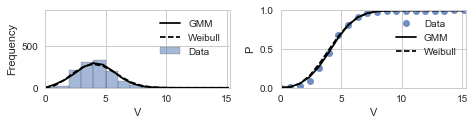

5.0 (-5.0 - 15.0) degree
data size: 1208 weight 0.0332306338028169
GMM Weibull
R square 0.951240906649 0.945034452195
max diff: 0.0470656024633 0.063902679181 speed value: 2.38928653465 2.38928653465 y gmm 0.138953019682
 


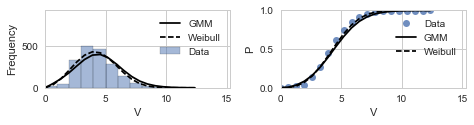

25.0 (15.0 - 35.0) degree
data size: 1869 weight 0.051413952464788734
GMM Weibull
R square 0.876718297506 0.935821913875
max diff: 0.0902596237601 0.0618385998351 speed value: 4.56181871715 4.56181871715 y gmm 0.529858086245
 


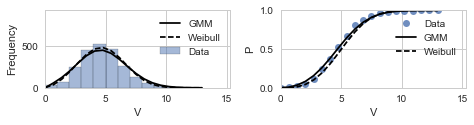

45.0 (35.0 - 55.0) degree
data size: 2275 weight 0.0625825264084507
GMM Weibull
R square 0.951662926333 0.975874544086
max diff: 0.0467838410245 0.0828960517925 speed value: 6.14258467311 6.14258467311 y gmm 0.75849088425
 


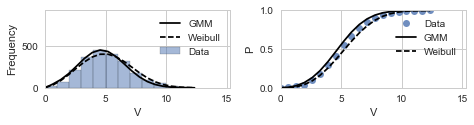

65.0 (55.0 - 75.0) degree
data size: 2182 weight 0.060024207746478875
GMM Weibull
R square 0.980365977917 0.97564876523
max diff: 0.0514941318158 0.0722933365271 speed value: 4.54885984788 5.84853409013 y gmm 0.465792940248
 


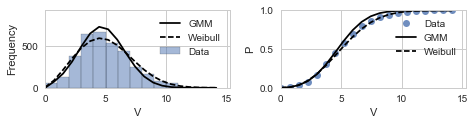

85.0 (75.0 - 95.0) degree
data size: 3411 weight 0.0938325264084507
GMM Weibull
R square 0.96168695781 0.963319727156
max diff: 0.065860731889 0.0462730316212 speed value: 7.44467707976 5.21127395583 y gmm 0.923966859124
 


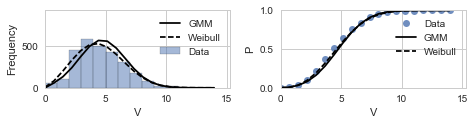

105.0 (95.0 - 115.0) degree
data size: 2718 weight 0.07476892605633803
GMM Weibull
R square 0.905247364468 0.9617251544
max diff: 0.0892990248248 0.0566047696823 speed value: 4.41120032054 4.41120032054 y gmm 0.42578559622
 


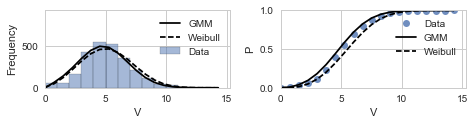

125.0 (115.0 - 135.0) degree
data size: 2549 weight 0.07011993838028169
GMM Weibull
R square 0.951633902787 0.944431136497
max diff: 0.0707709490967 0.109841049305 speed value: 3.01331142732 6.02662285463 y gmm 0.18257950147
 


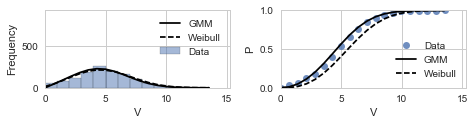

145.0 (135.0 - 155.0) degree
data size: 1271 weight 0.03496368838028169
GMM Weibull
R square 0.945727486871 0.953575353828
max diff: 0.0403833229352 0.140337160176 speed value: 4.28017558124 4.99353817811 y gmm 0.438495045988
 


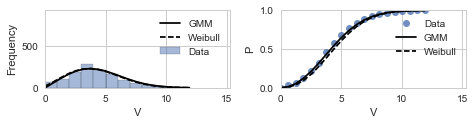

165.0 (155.0 - 175.0) degree
data size: 1248 weight 0.03433098591549296
GMM Weibull
R square 0.943616525485 0.948348481113
max diff: 0.0406663578019 0.0853932131329 speed value: 4.3930142222 4.3930142222 y gmm 0.543468257583
 


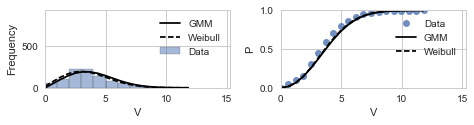

185.0 (175.0 - 195.0) degree
data size: 929 weight 0.02555567781690141
GMM Weibull
R square 0.91012759544 0.941601555435
max diff: 0.0961267829385 0.0823045632763 speed value: 3.73495338268 3.73495338268 y gmm 0.501289794026
 


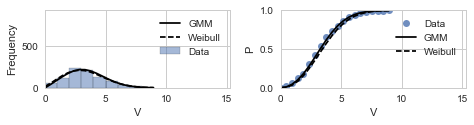

205.0 (195.0 - 215.0) degree
data size: 889 weight 0.02445532570422535
GMM Weibull
R square 0.954879349436 0.952007327909
max diff: 0.042722643154 0.0877612091694 speed value: 3.77239866748 3.77239866748 y gmm 0.618694679681
 


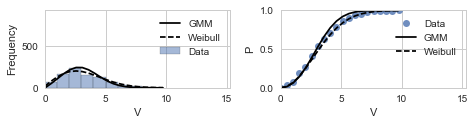

225.0 (215.0 - 235.0) degree
data size: 882 weight 0.024262764084507043
GMM Weibull
R square 0.920439944249 0.963769202425
max diff: 0.0781669335009 0.060831839651 speed value: 4.61564303714 3.0770953581 y gmm 0.861613645519
 


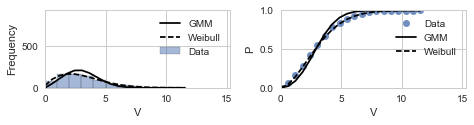

245.0 (235.0 - 255.0) degree
data size: 737 weight 0.02027398767605634
GMM Weibull
R square 0.861070291741 0.988096511278
max diff: 0.0798137247189 0.0332256046217 speed value: 1.82522208275 4.25885152641 y gmm 0.205125216936
 


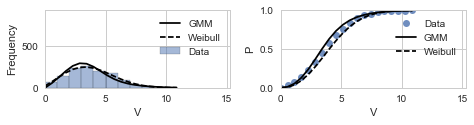

265.0 (255.0 - 275.0) degree
data size: 1228 weight 0.03378080985915493
GMM Weibull
R square 0.925325363926 0.984511880572
max diff: 0.0557977042569 0.0770027503881 speed value: 4.57611898436 4.00410411131 y gmm 0.734950798719
 


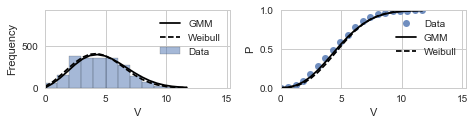

285.0 (275.0 - 295.0) degree
data size: 2167 weight 0.05961157570422535
GMM Weibull
R square 0.943867030201 0.957828744943
max diff: 0.0544557540588 0.08270846143 speed value: 3.08272693113 3.08272693113 y gmm 0.228885270399
 


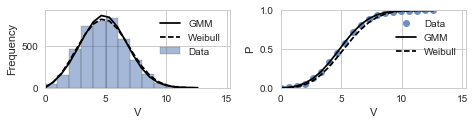

305.0 (295.0 - 315.0) degree
data size: 4149 weight 0.11413402288732394
GMM Weibull
R square 0.991721299441 0.990036861334
max diff: 0.0132168539324 0.0717136831947 speed value: 1.99170516522 5.97511549566 y gmm 0.0590110212016
 


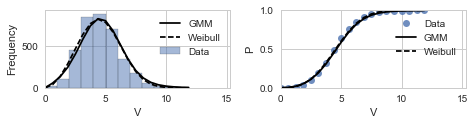

325.0 (315.0 - 335.0) degree
data size: 3596 weight 0.09892165492957747
GMM Weibull
R square 0.958346555665 0.968027521842
max diff: 0.0511409519688 0.0358550159886 speed value: 4.99682755727 4.99682755727 y gmm 0.586790082514
 


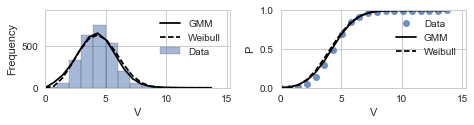

345.0 (335.0 - 355.0) degree
data size: 2586 weight 0.07113776408450705
GMM Weibull
R square 0.961854899076 0.957669132061
max diff: 0.0621964132674 0.0890503376649 speed value: 2.89256257128 3.6157032141 y gmm 0.199087364544
 
Wall time: 44.4 s


In [80]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9474769273860618 0.9637138619294516


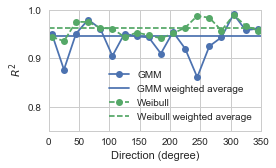

In [81]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.05670408614603062 0.07184726224052819


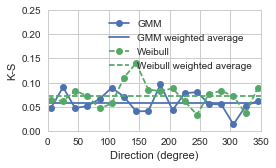

In [82]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

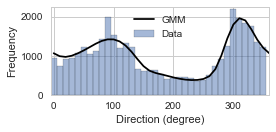

In [83]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.5 Insufficient-fit Sector Investigation

### (1) Data Variability, by Bootstrap (Resampling)

In [84]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [85]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


185.0 (175.0 - 195.0) Degree Speed Distribution
0.102130487342 4.0 0.554489534187


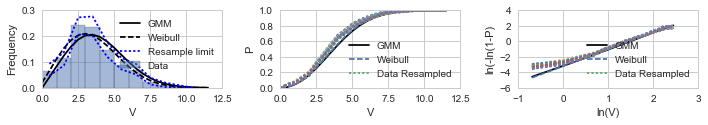

In [86]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### (2) Time Variability

In [87]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(2001, 2015, 5):
    end_time = start_time + 4 
    df_other_years = df_all_years[str(start_time):str(end_time)]
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = start_time)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = start_time)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=start_time, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = start_time*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if start_time == 2011 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if start_time == 2011 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log


185.0 (175.0 - 195.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXt8G9WZ//+ZGd1l2fLd8SW2cyNQoIFAuQQCW6DLpg19
0SUEyv0Ou2xL8ystl5ZmUxqyZOnSZTfZsrygwLblElpKaEjY0ABt4NtC2gCG5rKJE3KxZcmydZdG
o5nfH84ZRqPRfSSPrfN+vWgdyRoda0bnM89znudzGEmSJFAoFAqFQskJO9kDoFAoFAplKkAFk0Kh
UCiUAqCCSaFQKBRKAVDBpFAoFAqlAKhgUigUCoVSAFQwKRQKhUIpACqYFAqFQqEUABVMCoVCoVAK
gAomhUKhUCgFQAWTQqFQKJQCoIJJoVAoFEoBUMGkUCgUCqUAqGBSKBQKhVIAVDApFAqFQikAKpgU
CoVCoRQAFUwKhUKhVI1Dhw7hG9/4Bi6//HJce+21uPXWW7F371489thjOP744+HxeOTfHR0dxec+
9zn86le/wuHDh3Hcccfh8ccfTzve7bffjmuuuaYqY6eCSaFQKJSqEIvFcMcdd+CGG27ACy+8gGee
eQZ33nknVq1aBQDo6+vDa6+9Jv/+pk2bMGPGDPnfM2fOxJYtW+R/j42N4eDBg1Ubv6lq70ShUCgU
w3D33XfjxRdf1PWYy5Ytw9q1a7M+v23bNpx55pk45ZRT5MdOPvlkPPPMM/iP//gPLFmyBJs3b8b1
118v//7f/M3fyL/b2NgIt9uNffv2Yfbs2Xjttddw8cUX4/3339f178gGjTApFAqFUhUOHz6MmTNn
yv++4447cM011+Diiy/G8PAwWlpaYLfbcejQIRw8eBAdHR2wWq1px/jyl7+M3/72twCAN954Axde
eGHVxk8jTAqFQqlB1q5dmzMarAQdHR0YGBiQ/71+/XoAwOWXX45UKgXgM0EUBAFLly7F9u3b045x
4YUX4qqrrsLXvvY1tLa2wmazVW38NMKkUCgUSlW44IIL8O6772Lnzp3yYwcPHsTw8DAYhgEA/O3f
/i3eeOMNvP/++zjjjDMyjuF0OtHf34+1a9fiK1/5StXGDlDBpFAoFEqVcDqdWL9+PZ5++mlcffXV
uOKKK3Dffffh3nvvRWdnJwDA5XKho6MDJ5xwAlhWW6KWLl2KHTt24Kyzzqrm8MFIkiRV9R0pFAqF
QpmC0AiTQqFQKJQCoIJJoVAoFEoB0CpZSk0iiiIEQQDP8+A4DizLguM4cBwnFx9QKBSKEiqYlJpC
FEV4PB40NjbK/5YkCZIkIRKJIBQKobOzEyzLgmEYKqQUCkWGCialJhBFEalUCqIoYmhoCG63G6Io
IplMwmw2y2JIBJT0hJGaOIZhZAGlQkqh1CZUMCnTGpJ6VRaDS5IEr9cLv98PhmGQSqVgsVjAsiwE
QUAkEoHFYoHJZEoTw0KF1GQyyf+mUCjTB1r0Q5mWpFIp8DwPnudlcRMEQd4Jged59Pf3o7+/H7Nm
zUJbWxusViskScLY2Bg+/fRT7Nu3D59++imGh4cxNjaGSCQiiy8RSuAzIRUEAYlEQk7thsNhRKNR
xGIxJBIJpFIp0C4uSi1z3XXX4cMPPwQw8R1cuHAhnnjiCfn5a665Bn/9618zXvf222/j+eefx+HD
h3H55ZcX/H6LFi2Sj7tv374yR08jTMo0I5VKyalXImqCIMDn82FsbAz19fVgWRYzZswAx3Fy0Y/d
bockSUgkEuju7paPlUgkwPM8EokEwuGwLMBWqxUWiwUWi0X+OV9EmkgkAAAsy8oRKEnr0oiUUgss
WrQI77//Pk4++WTs2LED55xzDt566y3cfPPNSCQSOHLkCObPn5/xusWLFwOY8KKdTKhgUqYFWkKZ
TCbh8/kwPj6OhoYGzJ49GxaLBaFQKC2lmg2O4+BwOOBwONIeJ9W1REzD4TASiQQYhkkTUPKzep1T
KaTJZFKOWMm6aCKRkF9LhZRSSfr6Mh+78krgoYdKe/7Agdzvd/bZZ2PdunW48cYb8dZbb2HZsmX4
13/9V4RCIXz88cf4whe+gPfeew//9m//Bo7j0NPTg1WrVmHjxo3Yv38/rrjiCvj9ftx+++0YHR3F
+eefj3/8x3/EPffcgyVLlmDx4sV4++23sWnTJqxZs6a4D6MAqGBSpjRaQsnzPHw+HwKBANxuN+bM
mQOz2Zz3WAzDFJQyNZlMMJlMaUJKRJCIaDweRzAYBM/zYBhGFlGlmBIhVaZ2BUHA8PAw6uvr4XQ6
5ShUXWxEhZQyFTnhhBOwf/9+SJKE9957DytWrMBZZ52Fd955B7t378Y555yD73//+/jFL36B5uZm
PProo/j1r38Nk+kzqYpGo1i7di0cDgeuuuoqXHDBBVUbPxVMypRDkqS0qlelUHq9XgSDQTQ2NmLu
3LlpXzRCocJYDAzDyELqdDrTxkrWNnmeRywWw/j4uJwKVooo+X9yPOKjKYoiRFGUj6d8Xl1spBRg
CiUf+SLCcp9Xw7Is5s+fj7fffhutra2wWCxYvHgx3nzzTezatQtXXXUVvv/97+Ouu+4CAMTjcZx9
9tno7e2VjzF//ny4XC4AwEknnYTBwcG096hknQAVTMqUIZtQJhIJeL1ehEIhNDU1ZRVKQjbBrJSQ
ms3mjAhXkiQkk0m5MCkajcpCCkykfWOxWFpEqo4qCxFS5RophWIEFi1ahJ/+9Kf48pe/DABYuHAh
1q1bB2Big+iOjg6sW7cOLpcLb7zxBhwOB4aGhuTX79u3D5FIBFarFR9++CGWL1+Od999F16vFwDw
ySefVGzsVDAphocIpbpCNZFIYGRkBOFwuCChVDOZkRhZ7yQRJUGSJBw+fBg2mw0sy8qFRslkEiaT
STO1q44qlUJKBFhLSNVFShRKNTj77LPxve99Dw8//DAAwGKxwOVy4fjjjwfLsrj//vtx6623QpIk
OJ1OPPzww2mC2dDQgG9961vw+/1YsmQJ5syZg2XLluG+++7Dxo0b0ae18KoTdLcSimGRJAmxWAyB
QACNjY3y5B6Px+H1ehEOh9Hc3Izm5mZwHFfwcffu3Yuenh7YbDZZUAAgkUhgaGiool+4Qjhy5Aga
GhpQV1cnPyZJkhyNKit3BUGA2WzOSO0qzRi0yBaRmkwmasZAoWSBRpgUw0EKaFKpFOLxOMbGxtDU
1IRYLAav14toNIrm5mZ0dnYWJZSESqReKw0pHLJarfL6DQDZrYiIKCk0IkKqjkiJkBYSkRIDB6fT
SV2NKBRQwaQYCKVQKlstUqkUDh48iFgshpaWFnR3d5e9JletNcxKw7KsLKRKRFFMi0bJ+ihxNVK3
vmgVDIVCIdjt9rQ0N0nnUntASi1CBZMy6WgJJcMwiEajGB4eBs/zaG5uRk9Pjy7FK7UwubMsC5vN
BpvNlva40gEpkUggGo0ikUhAFMWMaJT0iqo/L7U9IHk/6rNLme5QwaRMGtmEMhKJYGRkBDzPo7Gx
EclkEs3Nzbq9bzWrZEulUuMgrkZ2uz3tcSKkSjOGeDyOaDSKQCCQIaa5zBioYT1lukIFk1J1tIQS
AMLhMEZGRiAIAlpbW+F2u5FMJjE2Nqbr+yuF0UgiOZloCenQ0BDsdjssFktWVyN1sREVUsp0hgom
pWooTcqBz1J9oVAIIyMjSKVSaGtrQ0NDg/xcNQWNimc6kiRp2gMW6mpUbEQKZKZ26c4vFCNBBZNS
cYjZgHJNTJIkBINBeL1eiKKItrY21NfXZ0yMlTITMLIwGl0c8rkakdRuPB5HIBDI6WqkFkMtw3pR
FDEyMoLu7m5qWE+ZVKhgUiqG0pWHpF4lSUIgEJBdOVpbWzWFklBNwTS6kFabYj8LpauRWkizuRpx
HKdpxqAWw0g

### (3) Adjacent Sector Variability

In [88]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [89]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


185.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl0HOWV//2tqt67ta+WJdmSFxwwAsJiwPnxgwECLwkv
yQz2BBMHTFjiMJMYTjKAWcOaACGQxWRI3iGJSeLYkBAIGA4YHCfsSwLDYrBlW7ZsqTepW73X+v4h
PeXqVnWrl+pSq/V8zuFgtVq19FLfuve593sZRVEUUCgUCoVCyQk73QdAoVAoFMpMgAomhUKhUCh5
QAWTQqFQKJQ8oIJJoVAoFEoeUMGkUCgUCiUPqGBSKBQKhZIHVDApFAqFQskDKpgUCoVCoeQBFUwK
hUKhUPKACiaFQqFQKHlABZNCoVAolDyggkmhUCgUSh5QwaRQKBQKJQ+oYFIoFAqFkgdUMCkUCoVC
yQMqmBQKhUIxjQMHDuBb3/oWVq5cia997Wu48sorsWvXLvzkJz/BZz7zGXi9XvW5wWAQRx11FP74
xz9icHAQRxxxBB555JG07X3jG9/A6tWrTTl2KpgUCoVCMYVEIoG1a9dizZo12Lx5M37zm9/gP/7j
P3D77bcDAObPn4+tW7eqz3/22WcxZ84c9efu7m48//zz6s+jo6MYGBgw7fgtpu2JQqFQKBXDd7/7
XWzZssXQba5YsQL33Xdf1t+//PLLOPnkk3Hcccepj/X19eE3v/kNfvrTn+K8887Dc889h0svvVR9
/hlnnKE+t6GhAfX19ejv78eCBQuwdetWnHvuuXj77bcNPY9s0AiTQqFQKKYwODiI7u5u9ee1a9di
9erVOPfcczE8PIzm5mY4nU4cOHAAAwMDaG9vh91uT9vGF77wBTzzzDMAgG3btuGss84y7fhphEmh
UCizkPvuuy9nNFgO2tvb8cEHH6g/P/zwwwCAlStXQpIkAIcFURRFnH/++XjllVfStnHWWWfh4osv
xr/+67+ipaUFDofDtOOnESaFQqFQTOHMM8/Ea6+9hn/+85/qYwMDAxgeHgbDMACAc845B9u2bcPb
b7+NZcuWTdqG2+1GT08P7rvvPnzxi1807dgBKpgUCoVCMQm3242HH34Yv/71r/HVr34VX/nKV7B+
/XrccMMN6OjoAADU1NSgvb0dRx55JFhWX6LOP/98vPPOOzjllFPMPHwwiqIopu6RQqFQKJQZCI0w
KRQKhULJAyqYFAqFQqHkAa2SpcxKZFmGKIrgeR4cx4FlWXAcB47j1OIDCoVC0UIFkzKrkGUZXq8X
DQ0N6s+KokBRFMRiMUQiEXR0dIBlWTAMQ4WUQqGoUMGkzApkWYYkSZBlGUNDQ6ivr4csyxAEAVar
VRVDIqCkJ4zUxDEMowooFVIKZXZCBZNS1ZDUq7YYXFEU+P1+jIyMgGEYSJIEm80GlmUhiiJisRhs
NhssFkuaGOYrpBaLRf2ZQqFUD7Toh1KVSJIEnufB87wqbqIoqpMQeJ5HT08Penp60Nvbi9bWVtjt
diiKgtHRUezfvx/9/f3Yv38/hoeHMTo6ilgspoovEUrgsJCKoohUKqWmdqPRKOLxOBKJBFKpFCRJ
Au3iosxmLrnkErz//vsAxr+Dxx9/PH75y1+qv1+9ejU+/vjjSX+3Y8cO/OEPf8Dg4CBWrlyZ9/6W
L1+ubre/v7/Eo6cRJqXKkCRJTb0SURNFEYFAAKOjo6itrQXLspgzZw44jlOLfpxOJxRFQSqVQmdn
p7qtVCoFnueRSqUQjUZVAbbb7bDZbLDZbOq/p4pIU6kURFHE6Ogo5syZA4Zh1LQujUgps4Hly5fj
7bffRl9fH9555x187nOfw1//+ldcfvnlSKVSOHjwIJYsWTLp70477TQA41600wkVTEpVoCeUgiAg
EAggFAqhrq4OCxYsgM1mQyQSSUupZoPjOLhcLrhcrrTHSXUtEdNoNIpUKgWGYdIElPxbu85JiouI
kAqCoEasZF1U+28qpJRyMn/+5Mcuugi4557ifr9vX+79nXrqqdiwYQMuu+wy/PWvf8WKFStw//33
IxKJ4MMPP8RJJ52Et956Cz/60Y/AcRy6urpw++234+mnn8aePXvwla98BSMjI/jGN76BYDCI008/
HVdffTWuv/56nHfeeTjttNOwY8cOPPvss/j+979f2IuRB1QwKTMaPaHkeR6BQADhcBj19fVYuHAh
rFbrlNtiGCavlKnFYoHFYkkTUhJNEhFNJpMYGxsDz/NgGEYVUY7j1AIkIo5aMRVFUf03EVKtcFIh
pcxkjjzySOzZsweKouCtt97Ctddei1NOOQWvvvoqPvnkE3zuc5/DzTffjN/97ndoamrCgw8+iD/9
6U+wWA5LVTwex3333QeXy4WLL74YZ555pmnHTwWTMuNQFCWt6lUrlH6/H2NjY2hoaMCiRYvSvmiE
fIWxEBiGUYXU7XanHStZ2+R5HolEArIsY8+ePeA4Li0iJf8nYqit3JVlWd0e2R/LspOKjbR/R6FM
xVQRYam/z4RlWSxZsgQ7duxAS0sLbDYbTjvtNGzfvh07d+7ExRdfjJtvvhnr1q0DACSTSZx66qmY
N2+euo0lS5agpqYGAHD00Udj7969afsoZ50AFUzKjCGbUKZSKfj9fkQiETQ2NmYVSkI2wSyXkFqt
VjXC5XkeBw8exPz58yEIglqYFI/HEQqFwPM8LBbLpPVRrZAScglpLBaD0+mEw+FQI1IKpRJYvnw5
/vu//xtf+MIXAADHH388NmzYAGB8QHR7ezs2bNiAmpoabNu2DS6XC0NDQ+rf9/f3IxaLwW634/33
38e///u/47XXXoPf7wcAfPTRR2U7diqYlIqHCOXIyAhCoRC6u7tVofT5fIhGo3kJZSbTEYkRUSbr
nTabLe33iqJAEIS09VGe5yEIAiwWy6Ro1GazTYoqZVlGMBhEQ0ND1oiU47hJRUoUihmceuqpuOmm
m3DvvfcCAGw2G2pqavCZz3wGLMvixhtvxJVXXglFUeB2u3HvvfemCWZdXR2uueYajIyM4LzzzsPC
hQuxYsUKrF+/Hk8//TTm6y28GgSdVkKpWMi6IGnHiEajCAaDaG9vh9/vRzQaRVNTE5qamsBxXN7b
3bVrF7q6uuBwOMDzvPp4KpXC0NBQWb9wgiDgwIED6O3tLejvFEVRo1Ft5a4oirBarZNSu16vF42N
jWnp4cztAZOF1GKxUDMGCiULNMKkVByZQqldo0wkEti3bx+amprQ0dFRkFASypF6LTekcMhut6vr
NwBUtyIioqTQSBAEeL1eOJ3ONDElrkbZUrvkBkIrpNTViEIZhwompWLIJpTxeBx+vx/xeBwsy2LR
okUlr8mZtYZZbliWVYVUy4EDB+DxeMCyLHieV9dHiatRZuuLXsEQEVLta0LSueS5JLVMhZQyG6CC
SZl2cgmlz+dDMplES0sLmpqa4PV6SxbL6b64myXKNpttUkpW64CUSqUQj8eRSqUgy7Lu+qjeOifp
IZUkCf39/eoNDPXZpVQ7VDAp00Y2oYzFYvD5fOB5Hi0tLeju7gbLskgkEoaIjZlVsnr7MAu9fRFX
I6fTmfY4EdLMYiNFUXRbXzKjTGpYT5kNUMGkmI6eUAJANBqFz+eDKIpoaWlBfX192oXVKEHTbmcm
pmHLQTYhzeVqZLVaoSgKQqGQrqsRkL9hPRVSykyACibFNLQm5cDhCCgSicDn80GSJLS2tqKuri7r
hbOc4kbFczK5XI0SiQSGh4ezuhrpRaSZ2yD/JuiZMVBXI0qlQAWTUnYkScLo6Cg8Hg+Aw8I0NjYG
v98PWZbR2tqK2tranBfGckSYlMIh7SculwsMw6C9vR3AYVcjEpEmk0mEw2HV4D6XqxFBz7BelmX4
fD50dnZSw3r

# 7. Result Variability & Cross-Validation

In [90]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.6 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.425  -0.089   3.725  2.936  2.060  -0.052
2  0.337   3.381  -2.014  1.624  2.783   0.247
3  0.238  -0.245  -1.961  3.110  2.102  -0.552

GMM Plot Result
0.424790764549 [[-0.08884716  3.7248111 ]] [ 2.05477595  2.93966383] -94.0864229235
0.337270747548 [[ 3.38141258 -2.01382129]] [ 1.55040062  2.82474332] 168.187124594
0.237938487903 [[-0.24527827 -1.96080723]] [ 1.60742195  3.39246025] -116.977201154


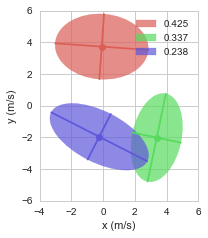

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.013      0.040  2.733819e-07      0.032       0.154

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.050  2.885410e-07      0.033       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.425  -0.185   3.717  2.894  2.074   0.016
2  0.341   3.374  -2.022  1.629  2.828   0.253
3  0.234  -0.112  -1.936  3.068  1.909  -0.468

GMM Plot Result
0.425200287703 [[-0.18471925  3.71653543]] [ 2.07330814  2.89419794] -88.6085622455
0.340875245372 [[ 3.3741619  -2.02231198]] [ 1.55307311  2.87097717] 168.231443048
0.233924466924 [[-0.11203527 -1.93618459]] [ 1.5971148   3.24117451] -111.779861432


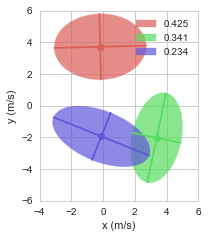

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.977  0.013      0.051  3.114143e-07      0.033       0.164

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.047  2.832928e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.410  -0.221   3.826  2.871  2.028  -0.019
2  0.340   3.424  -1.870  1.609  2.873   0.234
3  0.250  -0.201  -1.854  3.059  1.987  -0.491

GMM Plot Result
0.409586856119 [[-0.22067526  3.82598417]] [ 2.02693292  2.87148988] -91.4968081311
0.34021015335 [[ 3.42351165 -1.86981504]] [ 1.54632344  2.90699487] 169.55669823
0.250202990531 [[-0.20092897 -1.85429847]] [ 1.61964824  3.26845761] -113.9220499


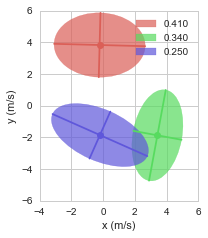

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.049  2.799679e-07      0.033       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.049  2.890261e-07      0.033       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.416  -0.010   3.762  2.929  2.014  -0.061
2  0.312   3.433  -1.862  1.563  2.581   0.221
3  0.272  -0.149  -2.005  3.207  2.292  -0.576

GMM Plot Result
0.416180114875 [[-0.01027001  3.76245928]] [ 2.00639187  2.93391501] -94.5396014865
0.31156649544 [[ 3.43287414 -1.86170136]] [ 1.50367957  2.61537602] 168.541338611
0.272253389685 [[-0.14886638 -2.00473326]] [ 1.68683399  3.56231639] -119.632985826


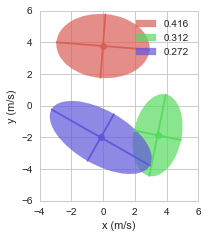

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.014      0.057  2.969149e-07      0.033       0.160

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.016      0.038  2.882139e-07      0.033       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.425  -0.073   3.787  2.922  2.025  -0.026
2  0.329   3.396  -2.076  1.631  2.667   0.210
3  0.245  -0.379  -1.866  2.993  2.039  -0.477

GMM Plot Result
0.425410202362 [[-0.07276737  3.78656793]] [ 2.02392114  2.92267097] -92.0196448832
0.329462331136 [[ 3.39623963 -2.07624253]] [ 1.57417314  2.70058936] 168.829942241
0.245127466502 [[-0.3792902  -1.86604595]] [ 1.66954473  3.21365917] -115.241886431


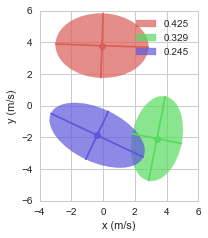

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.976  0.014      0.046  3.197206e-07      0.034       0.166

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.034  2.870274e-07      0.033       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.416  -0.149   3.762  2.915  2.012  -0.008
2  0.339   3.353  -2.029  1.640  2.835   0.245
3  0.244  -0.271  -1.899  3.034  1.974  -0.489

GMM Plot Result
0.41611092076 [[-0.14904495  3.7621685 ]] [ 2.01222048  2.91485846] -90.6423082118
0.339424178031 [[ 3.35264439 -2.02864539]] [ 1.56758595  2.87577614] 168.47048897
0.244464901209 [[-0.27138173 -1.89874469]] [ 1.61275766  3.24105617] -113.903014801


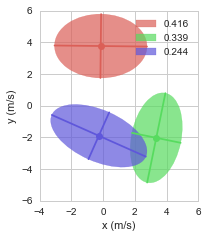

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.977  0.015      0.059  3.108662e-07      0.034       0.164

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.044  2.835213e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.413  -0.143   3.776  2.903  2.026   0.003
2  0.327   3.390  -1.917  1.611  2.735   0.237
3  0.259  -0.060  -2.016  3.084  2.121  -0.494

GMM Plot Result
0.413351976516 [[-0.14345973  3.77649462]] [ 2.02550376  2.90255406] -89.7598991046
0.327356378244 [[ 3.38969978 -1.91655335]] [ 1.54349499  2.77414228] 168.445116796
0.25929164524 [[-0.06022671 -2.01627987]] [ 1.70763678  3.33069732] -116.085699543


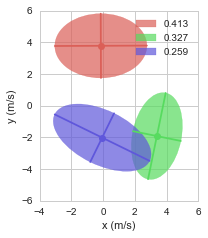

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.013      0.031  2.616465e-07      0.032       0.151

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.031  2.836046e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.425  -0.104   3.733  2.931  2.040  -0.029
2  0.351   3.369  -2.018  1.657  2.787   0.226
3  0.223  -0.353  -1.907  3.036  1.951  -0.525

GMM Plot Result
0.425364626961 [[-0.10400909  3.73260102]] [ 2.03805882  2.93193505] -92.2180310928
0.351212703934 [[ 3.36892684 -2.0177584 ]] [ 1.59256537  2.82410191] 168.72062553
0.223422669104 [[-0.35291481 -1.90654545]] [ 1.54594503  3.26104072] -114.49015413


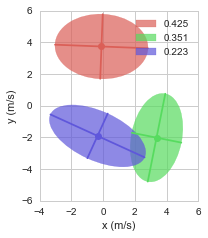

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.977  0.015      0.102  3.070427e-07      0.034       0.163

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.066  2.854585e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.418  -0.215   3.740  2.867  2.054  -0.006
2  0.329   3.342  -1.979  1.628  2.850   0.265
3  0.253  -0.009  -1.987  3.138  1.995  -0.471

GMM Plot Result
0.418090932798 [[-0.21509586  3.73966069]] [ 2.05367599  2.86722986] -90.4786218592
0.328908238485 [[ 3.34236664 -1.97856153]] [ 1.54476857  2.89615621] 167.925660727
0.253000828717 [[-0.00945201 -1.98675511]] [ 1.6602239  3.3276144] -112.567232437


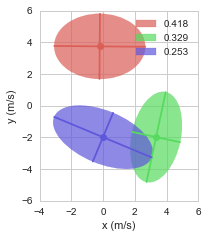

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.043  2.832868e-07      0.034       0.157

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.035  2.849787e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.422  -0.139   3.746  2.899  2.052  -0.007
2  0.333   3.372  -1.978  1.637  2.816   0.266
3  0.245  -0.055  -1.929  3.098  1.943  -0.490

GMM Plot Result
0.421961416402 [[-0.13890843  3.74616905]] [ 2.05236208  2.89930012] -90.5755772254
0.333170506641 [[ 3.37183613 -1.9777731 ]] [ 1.55178809  2.86403832] 167.496323098
0.244868076957 [[-0.05451535 -1.92857548]] [ 1.59465748  3.29058383] -112.68942512


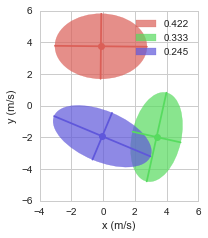

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.035  2.871745e-07      0.033       0.158

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.052  2.836964e-07      0.033       0.157


Wall time: 13.2 s


In [91]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [92]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number of train/test dataset 27264.0 9088.0
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.125652  0.075196  0.000003    0.112012     0.545358  0.748538
1    0.122982  0.075066  0.000003    0.114979     0.541972  0.749330
2    0.123170  0.074682  0.000003    0.113126     0.540429  0.749490
3    0.122912  0.074154  0.000003    0.112445     0.539118  0.756024

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.123635  0.075791  0.000003    0.117933     0.536330  0.753659
1    0.131682  0.071311  0.000003    0.108585     0.544314  0.753245
2    0.125816  0.077471  0.000003    0.111868     0.539487  0.761062
3    0.133483  0.079511  0.000004    0.118355     0.564634  0.721196

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.053759  0.031978  8.063694e-07    0.054566     0.264290  0.940958
1    0.056268  0.033372  8.141851e-07    0.055794     0.265580  0.939685
2    0.052469  0.033843  8.037273e-07    0.055436     0.264045  0.941108
3    0.056114  0.033782  8.062644e-07    0.055232     0.264427  0.940505

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.066862  0.032531  8.916187e-07    0.060190     0.278283  0.933672
1    0.055335  0.035049  8.439985e-07    0.055541     0.270712  0.939286
2    0.064377  0.039077  8.929600e-07    0.057123     0.277898  0.933701
3    0.053890  0.034207  8.631602e-07    0.057043     0.273327  0.937176

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.031014  0.013616  2.841989e-07    0.033618     0.156900  0.979052
1    0.049373  0.014877  2.863673e-07    0.032572     0.157651  0.979040
2    0.046526  0.014519  2.894633e-07    0.032925     0.158398  0.978612
3    0.044621  0.013838  2.717335e-07    0.031726     0.153430  0.980012

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.164081  0.017871  3.496064e-07    0.033814     0.174258  0.974496
1    0.048116  0.013636  3.465120e-07    0.037327     0.172979  0.974192
2    0.024342  0.015727  3.382840e-07    0.036270     0.171247  0.975504
3    0.047222  0.018707  3.899710e-07    0.039608     0.184009  0.971377

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.032777  0.008741  2.343393e-07    0.029759     0.142561  0.982656
1    0.032510  0.009283  2.141363e-07    0.028250     0.136138  0.984302
2    0.049476  0.013735  2.293132e-07    0.029485     0.141055  0.983175
3    0.050608  0.012631  2.425441e-07    0.030458     0.144994  0.982132

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.034508  0.011978  2.453214e-07    0.030466     0.145704  0.982293
1    0.042563  0.013664  3.416983e-07    0.036727     0.172489  0.974681
2    0.040615  0.013827  3.356651e-07    0.035468     0.170324  0.975181
3    0.049807  0.013427  2.843343e-07    0.032219     0.156996  0.979205

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.024812  0.008083  1.589253e-07    0.024744     0.117357  0.988362
1    0.020906  0.012614  1.901493e-07    0.026643     0.128445  0.986071
2    0.026433  0.008246  1.685905e-07    0.025595     0.120916  0.987459
3    0.019271  0.013764  1.880981e-07    0.026224     0.127609  0.986175

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.034402  0.012758  2.562983e-07    0.030269     0.149101  0.980931
1    0.023872  0.014705  2.493137e-07    0.031290     0.146793  0.981462
2    0.050121  0.015323  2.326783e-07    0.028489     0.141909  0.983481
3    0.030848  0.012091  2.453320e-07    0.032072     0.146099  0.981928

Wall time: 42.2 s


In [93]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.123679  0.074774  3.385607e-06    0.113141     0.541719  0.750846
2    0.054652  0.033244  8.076365e-07    0.055257     0.264586  0.940564
3    0.042884  0.014213  2.829408e-07    0.032710     0.156595  0.979179
4    0.041343  0.011098  2.300832e-07    0.029488     0.141187  0.983066
5    0.022856  0.010677  1.764408e-07    0.025802     0.123582  0.987017

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.128654  0.076021  3.443026e-06    0.114186     0.546191  0.747291
2    0.060116  0.035216  8.729343e-07    0.057474     0.275055  0.935959
3    0.070940  0.016485  3.560933e-07    0.036755     0.175623  0.973892
4    0.041873  0.013224  3.017548e-07    0.033720     0.161378  0.977840
5    0.034811  0.013719  2.459056e-07    0.030530     0.145975  0.981950

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


R_square


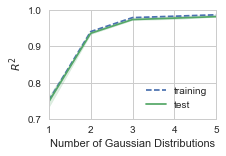

K_S


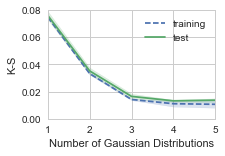

Chi_square


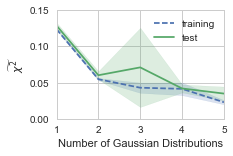

In [94]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

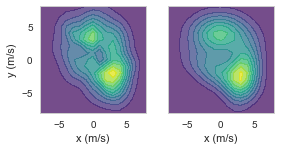

In [95]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

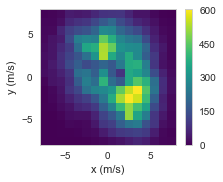

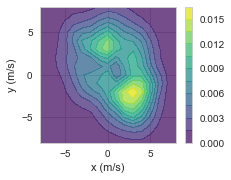

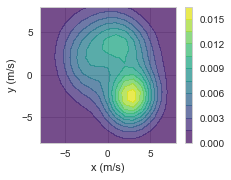

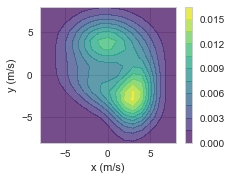

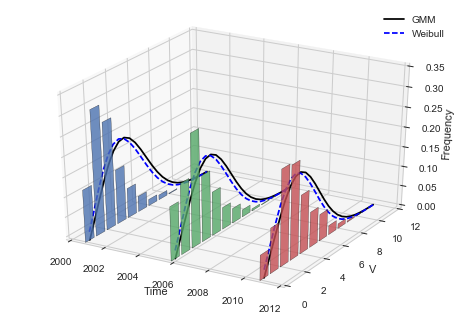

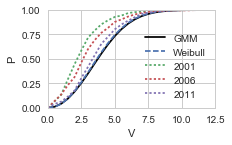

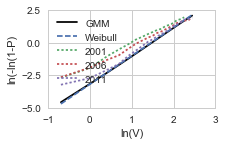

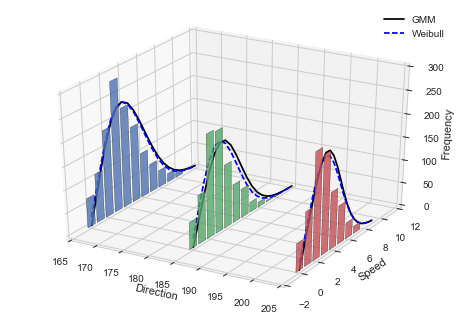

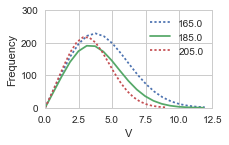

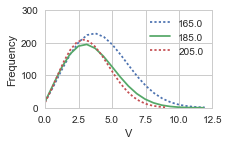

In [ ]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)